In [1]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from folium import Marker

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data-july-2023', '*'))
temp_dir

['temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv',
 'temperature-data-july-2023/planitgeo_cover_data .csv',
 'temperature-data-july-2023/#044A_Jul_27_2023_09_25_00.csv',
 'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv',
 'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv',
 'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv',
 'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv',
 'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv',
 'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv',
 'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv',
 'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv',
 'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv',
 'temperature-data-july-2023/#003 2023-07-26 16_37_06 MD

In [4]:
veg_dir = glob(os.path.join('veg-data', '*'))
veg_dir

['veg-data/cover_all.csv', 'veg-data/tree_abundance .csv']

In [5]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """
                                                                                                        
    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv


sensor_001 = import_temp_csv(
    'temperature-data-july-2023/#001 2023-07-26 16_03_44 MDT (Data MDT).csv')
sensor_002 = import_temp_csv(
    'temperature-data-july-2023/#002 2023-07-26 16_20_51 MDT (Data MDT).csv')
sensor_003 = import_temp_csv(
    'temperature-data-july-2023/#003 2023-07-26 16_37_06 MDT (Data MDT).csv')
sensor_004 = import_temp_csv(
    'temperature-data-july-2023/#004 2023-07-26 16_45_41 MDT (Data MDT).csv')
sensor_005 = import_temp_csv(
    'temperature-data-july-2023/#005 2023-07-27 09_10_26 MDT (Data MDT).csv')
sensor_006 = import_temp_csv(
    'temperature-data-july-2023/#006 2023-07-27 09_02_21 MDT (Data MDT).csv')
sensor_007 = import_temp_csv(
    'temperature-data-july-2023/#007 2023-07-27 08_57_01 MDT (Data MDT).csv')
sensor_008 = import_temp_csv(
    'temperature-data-july-2023/#008 2023-07-26 10_12_54 MDT (Data MDT).csv')
sensor_009 = import_temp_csv(
    'temperature-data-july-2023/#009 2023-07-26 11_40_53 MDT (Data MDT).csv')
sensor_010 = import_temp_csv(
    'temperature-data-july-2023/#010 2023-07-27 16_31_28 MDT (Data MDT).csv')
sensor_011 = import_temp_csv(
     'temperature-data-july-2023/#011 2023-07-27 16_10_01 MDT (Data MDT).csv')
sensor_012 = import_temp_csv(
     'temperature-data-july-2023/#012 2023-07-27 15_59_03 MDT (Data MDT).csv')
sensor_013 = import_temp_csv(
    'temperature-data-july-2023/#013 2023-07-27 15_46_42 MDT (Data MDT).csv')
sensor_014 = import_temp_csv(
    'temperature-data-july-2023/#014 2023-07-27 14_56_57 MDT (Data MDT).csv')
sensor_015 = import_temp_csv(
     'temperature-data-july-2023/#015 2023-07-27 14_47_01 MDT (Data MDT).csv')
sensor_016 = import_temp_csv( 
     'temperature-data-july-2023/#016 2023-07-27 11_07_55 MDT (Data MDT).csv')
sensor_017 = import_temp_csv( 
    'temperature-data-july-2023/#017 2023-07-27 16_18_24 MDT (Data MDT).csv')
sensor_018 = import_temp_csv(
    'temperature-data-july-2023/#018 2023-07-27 13_31_24 MDT (Data MDT).csv')
sensor_019 = import_temp_csv(
    'temperature-data-july-2023/#019 2023-07-20 09_56_28 MDT (Data MDT).csv')
sensor_020 = import_temp_csv(
     'temperature-data-july-2023/#020 2023-07-27 11_26_09 MDT (Data MDT).csv')
sensor_021 = import_temp_csv(
    'temperature-data-july-2023/#021 2023-07-27 10_51_59 MDT (Data MDT).csv')
sensor_022 = import_temp_csv(
    'temperature-data-july-2023/#022 2023-07-27 10_30_57 MDT (Data MDT).csv')
sensor_023 = import_temp_csv(
    'temperature-data-july-2023/#023 2023-07-27 10_12_17 MDT (Data MDT).csv')
sensor_024 = import_temp_csv(
     'temperature-data-july-2023/#024 2023-07-27 09_59_43 MDT (Data MDT).csv')
sensor_025 = import_temp_csv(
    'temperature-data-july-2023/#025 2023-07-27 09_53_14 MDT (Data MDT).csv')
sensor_026 = import_temp_csv(
    'temperature-data-july-2023/#026 2023-07-19 12_37_31 MDT (Data MDT).csv')
sensor_027 = import_temp_csv(
    'temperature-data-july-2023/#027 2023-07-27 15_04_27 MDT (Data MDT).csv')
sensor_028 = import_temp_csv(
    'temperature-data-july-2023/#028 2023-07-27 15_24_45 MDT (Data MDT).csv')
sensor_029 = import_temp_csv(
    'temperature-data-july-2023/#029 2023-07-27 15_12_52 MDT (Data MDT).csv')
sensor_030a = import_temp_csv(
     'temperature-data-july-2023/#030 2023-07-06 16_04_11 MDT (Data MDT).csv')
sensor_030b = import_temp_csv(
    'temperature-data-july-2023/#030 replacement  2023-07-27 16_39_11 MDT (Data MDT).csv')
sensor_031 = import_temp_csv(
    'temperature-data-july-2023/#031 2023-07-26 14_58_30 MDT (Data MDT).csv')
sensor_035 = import_temp_csv(
    'temperature-data-july-2023/#035 2023-07-26 15_52_04 MDT (Data MDT).csv')
sensor_036 = import_temp_csv(
    'temperature-data-july-2023/#036 2023-07-26 15_20_32 MDT (Data MDT).csv')
sensor_037 = import_temp_csv(
    'temperature-data-july-2023/#037 2023-07-20 08_31_09 MDT (Data MDT).csv')
sensor_038 = import_temp_csv (
    'temperature-data-july-2023/#038 2023-07-19 10_30_13 MDT (Data MDT).csv')
sensor_039 =  import_temp_csv(
    'temperature-data-july-2023/#039 replacement  2023-07-27 15_37_41 MDT (Data MDT).csv')
sensor_040 = import_temp_csv(
    'temperature-data-july-2023/#040 2023-07-26 14_45_51 MDT (Data MDT).csv')
#sensor_041 = import_temp_csv()
sensor_042 = import_temp_csv(
    'temperature-data-july-2023/#042 2023-07-19 13_42_35 MDT (Data MDT).csv')
sensor_043 = import_temp_csv(
    'temperature-data-july-2023/#043 2023-07-19 09_54_19 MDT (Data MDT).csv')

In [6]:
def edit_imported_temp_csv(df):
    """Edit sensor data to the correct parameters."""
    # Remove the first, third, and fourth columns
    df = df.drop(columns=[df.columns[0], df.columns[2], df.columns[3]])

    # Rename the index column to 'date_time'
    df.index.name = 'date_time'

    # Rename the first column to 'temp_fahrenheit'
    df = df.rename(columns={df.columns[0]: 'temp_fahrenheit'})

    return df



sensor_001 = edit_imported_temp_csv(sensor_001)
sensor_002 = edit_imported_temp_csv(sensor_002)
sensor_003 = edit_imported_temp_csv(sensor_003)
sensor_004 = edit_imported_temp_csv(sensor_004)
sensor_005 = edit_imported_temp_csv(sensor_005)
sensor_006 = edit_imported_temp_csv(sensor_006)
sensor_007 = edit_imported_temp_csv(sensor_007)
sensor_008 = edit_imported_temp_csv(sensor_008)
sensor_009 = edit_imported_temp_csv(sensor_009)
sensor_010 = edit_imported_temp_csv(sensor_010)
sensor_011 = edit_imported_temp_csv(sensor_011)
sensor_012 = edit_imported_temp_csv(sensor_012)
sensor_013 = edit_imported_temp_csv(sensor_013)
sensor_014 = edit_imported_temp_csv(sensor_014)
sensor_015 = edit_imported_temp_csv(sensor_015)
sensor_016 = edit_imported_temp_csv(sensor_016)
sensor_017 = edit_imported_temp_csv(sensor_017)
sensor_018 = edit_imported_temp_csv(sensor_018)
sensor_019 = edit_imported_temp_csv(sensor_019)
sensor_020 = edit_imported_temp_csv(sensor_020)
sensor_021 = edit_imported_temp_csv(sensor_021)
sensor_022 = edit_imported_temp_csv(sensor_022)
sensor_023 = edit_imported_temp_csv(sensor_023)
sensor_024 = edit_imported_temp_csv(sensor_024)
sensor_025 = edit_imported_temp_csv(sensor_025)
sensor_026 = edit_imported_temp_csv(sensor_026)
sensor_027 = edit_imported_temp_csv(sensor_027)
sensor_028 = edit_imported_temp_csv(sensor_028)
sensor_029 = edit_imported_temp_csv(sensor_029)
sensor_030a = edit_imported_temp_csv(sensor_030a)
sensor_030b = edit_imported_temp_csv(sensor_030b)
sensor_031 = edit_imported_temp_csv(sensor_031)
#sensor_032 = edit_imported_temp_csv(sensor_032)
#sensor_033 = edit_imported_temp_csv(sensor_033)
#sensor_034 = edit_imported_temp_csv(sensor_034)
sensor_035 = edit_imported_temp_csv(sensor_035)
sensor_036 = edit_imported_temp_csv(sensor_036)
sensor_037 = edit_imported_temp_csv(sensor_037)
sensor_038 = edit_imported_temp_csv(sensor_038)
sensor_039 = edit_imported_temp_csv(sensor_039)
sensor_040 = edit_imported_temp_csv(sensor_040)
#sensor_041 = edit_imported_temp_csv(sensor_041)
sensor_042 = edit_imported_temp_csv(sensor_042)
sensor_043 = edit_imported_temp_csv(sensor_043)

In [7]:
# Sensor 030 needs to be edited and combined. 
start_date_a = pd.to_datetime('2023-05-18')
end_date_a = pd.to_datetime('2023-07-08')

sensor_030a_period = sensor_030a[(sensor_030a.index >= start_date_a) & (sensor_030a.index <= end_date_a)]

start_date_b = pd.to_datetime('2023-07-08')

sensor_030b_period = sensor_030b[sensor_030b.index >= start_date_b]

sensor_030 = pd.concat([sensor_030a_period, sensor_030b_period])
sensor_030

temp_fahrenheit
date_time                           
2023-05-18 00:00:00            57.01
2023-05-18 00:05:00            56.55
2023-05-18 00:10:00            56.32
2023-05-18 00:15:00            56.01
2023-05-18 00:20:00            55.78
...                              ...
2023-07-27 16:19:00            93.08
2023-07-27 16:24:00            94.62
2023-07-27 16:29:00            95.32
2023-07-27 16:34:00            95.55
2023-07-27 16:38:50              NaN

[19978 rows x 1 columns]

In [8]:
# Create a function for files so that each is by day and night 5 am to 10 pm for HOBO sensors
def day_night_temps(df, sensor_number):
    df.index = pd.to_datetime(df.index)
    df['Time of Day'] = 'Day'
    df.loc[(df.index.hour >= 22) | (df.index.hour <= 5), 'Time of Day'] = 'Night'
    df['sensor_number'] = sensor_number
    return df

In [9]:
# Add function to all files (adding new column with sensor number and day/night)
day_night_temps(sensor_001, 'sensor_001')
day_night_temps(sensor_002, 'sensor_002')
day_night_temps(sensor_003, 'sensor_003')
day_night_temps(sensor_004, 'sensor_004')
day_night_temps(sensor_005, 'sensor_005')
day_night_temps(sensor_006, 'sensor_006')
day_night_temps(sensor_007, 'sensor_007')
day_night_temps(sensor_009, 'sensor_009')
day_night_temps(sensor_010, 'sensor_010')
day_night_temps(sensor_011, 'sensor_011')
day_night_temps(sensor_012, 'sensor_012')
day_night_temps(sensor_013, 'sensor_013')
day_night_temps(sensor_014, 'sensor_014')
day_night_temps(sensor_015, 'sensor_015')
day_night_temps(sensor_016, 'sensor_016')
day_night_temps(sensor_017, 'sensor_017')
day_night_temps(sensor_018, 'sensor_018')
day_night_temps(sensor_019, 'sensor_019')
day_night_temps(sensor_020, 'sensor_020')
day_night_temps(sensor_021, 'sensor_021')
day_night_temps(sensor_022, 'sensor_022')
day_night_temps(sensor_023, 'sensor_023')
day_night_temps(sensor_024, 'sensor_024')
day_night_temps(sensor_025, 'sensor_025')
day_night_temps(sensor_026, 'sensor_026')
day_night_temps(sensor_027, 'sensor_027')
day_night_temps(sensor_028, 'sensor_028')
day_night_temps(sensor_029, 'sensor_029')
day_night_temps(sensor_030, 'sensor_030')
day_night_temps(sensor_031, 'sensor_031')
#day_night_temps(sensor_032, 'sensor_032')
#day_night_temps(sensor_033, 'sensor_033')
#day_night_temps(sensor_034, 'sensor_034')
day_night_temps(sensor_035, 'sensor_035')
day_night_temps(sensor_036, 'sensor_036')
day_night_temps(sensor_037, 'sensor_037')
day_night_temps(sensor_038, 'sensor_038')
day_night_temps(sensor_039, 'sensor_039')
day_night_temps(sensor_040, 'sensor_040')
#day_night_temps(sensor_041, 'sensor_041')
day_night_temps(sensor_042, 'sensor_042')
day_night_temps(sensor_043, 'sensor_043')

temp_fahrenheit Time of Day sensor_number
date_time                                                     
2023-05-17 00:00:00            64.58       Night    sensor_043
2023-05-17 00:05:00            64.35       Night    sensor_043
2023-05-17 00:10:00            64.20       Night    sensor_043
2023-05-17 00:15:00            63.89       Night    sensor_043
2023-05-17 00:20:00            63.73       Night    sensor_043
...                              ...         ...           ...
2023-07-19 09:35:00            78.87         Day    sensor_043
2023-07-19 09:40:00            78.87         Day    sensor_043
2023-07-19 09:45:00            78.87         Day    sensor_043
2023-07-19 09:50:00            79.18         Day    sensor_043
2023-07-19 09:53:09              NaN         Day    sensor_043

[18266 rows x 3 columns]

In [10]:
# Combine all of the files that have been sorted into night and day into one and concat. 
nightday_list = (sensor_001,
sensor_002,
sensor_003,
sensor_004,
sensor_005,
sensor_006,
sensor_007,
sensor_008,
sensor_009,
sensor_010,
sensor_011,
sensor_012,
sensor_013,
sensor_014,
sensor_015,
sensor_016,
sensor_017,
sensor_018,
sensor_019,
sensor_020,
sensor_021,
sensor_022,
sensor_023,
sensor_024,
sensor_025,
sensor_026,
sensor_027,
sensor_028,
sensor_029,
sensor_030,
sensor_031,
#sensor_032,
#sensor_033,
#sensor_034,
sensor_035,
sensor_036,
sensor_037,
sensor_038,
sensor_039,
sensor_040,
#sensor_041,
sensor_042,
sensor_043)
nightday_df= pd.concat(nightday_list)
nightday_df

temp_fahrenheit Time of Day sensor_number
date_time                                                     
2023-05-17 00:00:00            65.51       Night    sensor_001
2023-05-17 00:05:00            65.28       Night    sensor_001
2023-05-17 00:10:00            65.12       Night    sensor_001
2023-05-17 00:15:00            64.89       Night    sensor_001
2023-05-17 00:20:00            64.81       Night    sensor_001
...                              ...         ...           ...
2023-07-19 09:35:00            78.87         Day    sensor_043
2023-07-19 09:40:00            78.87         Day    sensor_043
2023-07-19 09:45:00            78.87         Day    sensor_043
2023-07-19 09:50:00            79.18         Day    sensor_043
2023-07-19 09:53:09              NaN         Day    sensor_043

[768339 rows x 3 columns]

In [11]:
# Add start dates for HOBO sensors 

def filter_data_for_sensor_index_as_datetime(df, sensor_number, start_date):
    # Filter by sensor number and date range
    filtered_df = df.loc[(df.index >= start_date) & (df['sensor_number'] == sensor_number)]
    return filtered_df
# Filter sensors for start dates 
sensor_024 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-06-22 00:00:00')
sensor_026 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-25 00:00:00')
sensor_037 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-25 00:00:00')
sensor_038 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-20 00:00:00')
sensor_042 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-20 00:00:00')
sensor_043 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_024', '2023-05-19 00:00:00')
                                                    
# Change start dates for other sensors
sensor_001 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_001', '2023-05-18 00:00:00')
sensor_002 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_002', '2023-05-18 00:00:00')
sensor_003 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_003', '2023-05-18 00:00:00')
sensor_004 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_004', '2023-05-18 00:00:00')
sensor_005 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_005', '2023-05-18 00:00:00')
sensor_006 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_006', '2023-05-18 00:00:00')
sensor_007 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_007', '2023-05-18 00:00:00')
sensor_008 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_008', '2023-05-18 00:00:00')
sensor_009 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_009', '2023-05-18 00:00:00')
sensor_010 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_010', '2023-05-18 00:00:00')
sensor_011 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_011', '2023-05-18 00:00:00')
sensor_012 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_012', '2023-05-18 00:00:00')
sensor_013 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_013', '2023-05-18 00:00:00')
sensor_014 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_014', '2023-05-18 00:00:00')
sensor_015 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_015', '2023-05-18 00:00:00')
sensor_016 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_016', '2023-05-18 00:00:00')
sensor_017 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_017', '2023-05-18 00:00:00')
sensor_018 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_018', '2023-05-18 00:00:00')
sensor_019 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_019', '2023-05-18 00:00:00')
sensor_020 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_020', '2023-05-18 00:00:00')
sensor_021 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_021', '2023-05-18 00:00:00')
sensor_022 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_022', '2023-05-18 00:00:00')
sensor_023 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_023', '2023-05-18 00:00:00')
sensor_025 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_025', '2023-05-18 00:00:00')
sensor_027 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_027', '2023-05-18 00:00:00')
sensor_028 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_028', '2023-05-18 00:00:00')
sensor_029 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_029', '2023-05-18 00:00:00')
sensor_030 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_030', '2023-05-18 00:00:00')                                                      
sensor_031 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_031', '2023-05-18 00:00:00')
#sensor_032 = edit_imported_temp_csv(sensor_032)
#sensor_033 = edit_imported_temp_csv(sensor_033)
#sensor_034 = edit_imported_temp_csv(sensor_034)
sensor_035 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_035', '2023-05-18 00:00:00')
sensor_036 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_036', '2023-05-18 00:00:00')
sensor_039 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_039', '2023-05-18 00:00:00')
sensor_040 = filter_data_for_sensor_index_as_datetime(nightday_df, 'sensor_040', '2023-05-18 00:00:00')
#sensor_041 = edit_imported_temp_csv(sensor_041)

In [12]:
# Edit dates for sensor 30
start_date = '2023-06-06'
end_date = '2023-07-08'
sensor_to_exclude = 'sensor_030'

# Filter the DataFrame based on the condition
nightday_df = nightday_df[~((nightday_df['sensor_number'] == sensor_to_exclude) & (nightday_df.index >= start_date) & (nightday_df.index <= end_date))]

print("DataFrame after removing dates for", sensor_to_exclude, "within the specified date range:")
print(nightday_df)

DataFrame after removing dates for sensor_030 within the specified date range:
                     temp_fahrenheit Time of Day sensor_number
date_time                                                     
2023-05-17 00:00:00            65.51       Night    sensor_001
2023-05-17 00:05:00            65.28       Night    sensor_001
2023-05-17 00:10:00            65.12       Night    sensor_001
2023-05-17 00:15:00            64.89       Night    sensor_001
2023-05-17 00:20:00            64.81       Night    sensor_001
...                              ...         ...           ...
2023-07-19 09:35:00            78.87         Day    sensor_043
2023-07-19 09:40:00            78.87         Day    sensor_043
2023-07-19 09:45:00            78.87         Day    sensor_043
2023-07-19 09:50:00            79.18         Day    sensor_043
2023-07-19 09:53:09              NaN         Day    sensor_043

[759505 rows x 3 columns]


In [13]:
# Import veg cover 
veg_cover_orginial = pd.read_csv('veg-data/cover_all.csv')
veg_cover_uncomplete = veg_cover_orginial.dropna()
veg_cover_uncomplete

ID                                       Name  \
0     1                     Senior Living Facility   
1     2                              Mapleton Hill   
2     3                     North Boulder Park - A   
3     4                     North Boulder Park - B   
4     5               Foothills Community Park - A   
5     6               Foothills Community Park - B   
6     7                         Mobile Home Park B   
7     8                     Residential - The Hill   
8     9                          Columbia Cemetery   
9    10                           Low Priority EJ    
10   11                            Urban Wetland A   
11   12                       High Priority EJ - B   
12   13                       High Priority EJ - A   
13   14                  Boulder creek cold flow C   
14   15                              Golf Course B   
15   16                         Boulder Resevoir B   
16   17                                Mixed Urban   
17   18                         Mobile Home Park A   
18   19                             Sports Field C   
19   20                             Sports Field B   
20   21                         Boulder Resevoir A   
21   22                           Dry Natural Area   
22   23                  Urban-Grassland Interface   
23   24                       EJ Vulnerable Area A   
24   25                       EJ Vulnerable Area B   
25   26                                 Urban Farm   
26   27                               Industrial A   
27   28                  Boulder creek cold flow F   
28   29                               29th St Mall   
29   30                       Harlow Park A (BATP)   
30   31                  Boulder creek cold flow E   
31   32                       Crown Rock - BATP 64   
32   33                Crown Rock - Forest Opening   
33   34                         Crown Rock - Scree   
34   35                  Boulder creek cold flow B   
35   36                  Boulder creek cold flow A   
36   37                                 BATP - 498   
37   38                                 BATP - 487   
38   39                  Boulder creek cold flow G   
39   40                  Boulder creek cold flow D   
40   41                           BATP - Private 1   
41   42                           BATP - Private 2   
42   43                                 BATP - 298   
43   99                  Grassland - Tracy Collins   
44  44A     Foothills Community Park irrigated - C   
45  44B  Foothills Community Park un-irrigated - D   
46  45A              Valmont bike park irrigated A   
47  45B              Valmont bike park irrigated B   
48  46A                   Shanahan Ridge irrigated   
49  46B                Shanahan Ridge un-irrigated   
50  47A                Valmont disc park irrigated   
51  47B             Valmont disc park un-irrigated   
52  45C             Valmont bike park un-irrigated   
53  48A                 Sports field irrigated - D   
54  48B              Sports field un-irrigated - E   
55  44C  Foothills Community Park un-irrigated - E   
56  49A                Columbia cemetery irrigated   
57  49B             Columbia cemetery un-irrigated   

                      Location  %_avg_cover_grass  %_avg_cover_forb  \
0       (40.01529, -105.28639)          48.039216         14.215686   
1       (40.02051, -105.29113)          42.156863         28.431372   
2   (40.0272858, -105.2872161)          78.431373         33.333333   
3   (40.0288062, -105.2875383)          41.176471         19.117647   
4     (40.056943, -105.290043)          83.823529         32.843137   
5        (40.05773, -105.2883)          40.196078         33.823529   
6       (40.05564, -105.28424)          34.803922         15.196078   
7       (40.00722, -105.27949)          42.647059         12.745098   
8   (40.0090042, -105.2843139)          82.843137         61.274510   
9       (39.97694, -105.26022)          31.862745         27.941176   
10      (39.99494, -105.23594)       

In [14]:
# Get monthly max

nightday_agg = nightday_df.groupby(['Time of Day', 'sensor_number', pd.Grouper(freq='M')])['temp_fahrenheit'].agg(
    monthly_max='max', # Calculate the max temperature and name the new column 'monthly_max'
    temp_fahrenheit='first' # Keep the first (original) value of temp_fahrenheit in the new column
).reset_index()

# Print the resulting dataframe
nightday_agg

Time of Day sensor_number  date_time  monthly_max  temp_fahrenheit
0           Day    sensor_001 2023-05-31        80.88            55.01
1           Day    sensor_001 2023-06-30        94.08            53.93
2           Day    sensor_001 2023-07-31        96.63            58.71
3           Day    sensor_002 2023-05-31        79.95            56.32
4           Day    sensor_002 2023-06-30        92.00            53.69
..          ...           ...        ...          ...              ...
219       Night    sensor_042 2023-06-30        78.02            59.02
220       Night    sensor_042 2023-07-31        83.96            57.71
221       Night    sensor_043 2023-05-31        76.40            64.58
222       Night    sensor_043 2023-06-30        76.55            58.79
223       Night    sensor_043 2023-07-31        85.43            61.42

[224 rows x 5 columns]

In [15]:
# Get the daily max and average

# Get the daily max temperature for each day
daily_max_temps = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df.index.date])['temp_fahrenheit'].max()

# Convert the index to DatetimeIndex
nightday_df.index = pd.to_datetime(nightday_df.index)

# Create a new column with just the month
nightday_df['month'] = nightday_df.index.month

# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

# Calculate the average of daily max temperatures for each month
monthly_avg_max_temps = grouped['temp_fahrenheit'].mean()

# Convert the result to a DataFrame
monthly_avg_max_temps = monthly_avg_max_temps.reset_index()
monthly_avg_max_temps

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_67694/712595223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nightday_df['month'] = nightday_df.index.month


month Time of Day sensor_number  temp_fahrenheit
0        5         Day    sensor_001        65.060851
1        5         Day    sensor_002        64.694000
2        5         Day    sensor_003        65.299170
3        5         Day    sensor_004        65.188170
4        5         Day    sensor_005        63.711844
..     ...         ...           ...              ...
219      7       Night    sensor_038        64.441494
220      7       Night    sensor_039        67.119821
221      7       Night    sensor_040        65.707783
222      7       Night    sensor_042        65.937572
223      7       Night    sensor_043        67.905483

[224 rows x 4 columns]

In [16]:
def format_id(id_string):
    return f'sensor_{id_string.zfill(3)}'

veg_cover = veg_cover_uncomplete.copy()
veg_cover['ID'] = veg_cover_uncomplete['ID'].apply(format_id)
veg_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       58 non-null     object 
 1   Name                     58 non-null     object 
 2   Location                 58 non-null     object 
 3   %_avg_cover_grass        58 non-null     float64
 4   %_avg_cover_forb         58 non-null     float64
 5   %_avg_cover_shrub        58 non-null     float64
 6   %_avg_cover_A-C-R        58 non-null     float64
 7   %_avg_cover_bare-ground  58 non-null     float64
 8   %_avg_cover_water        58 non-null     float64
 9   %_avg_cover_XL-grass     58 non-null     float64
 10  %_avg_cover_XL-forb      58 non-null     float64
 11  %_avg_cover_XL-shrub     58 non-null     float64
 12  avg_green_cover          58 non-null     float64
 13  avg_impervious_cover     58 non-null     float64
dtypes: float64(11), object(3)
me

In [17]:
# Merge veg and temp data
# Merge veg and temp data without drop_duplicates
temps_veg = monthly_avg_max_temps.merge(veg_cover, left_on=['sensor_number'], right_on=['ID'], how='inner')
# List of column names to convert to float64
temps_veg

month Time of Day sensor_number  temp_fahrenheit          ID  \
0        5         Day    sensor_001        65.060851  sensor_001   
1        5       Night    sensor_001        56.006604  sensor_001   
2        6         Day    sensor_001        66.897813  sensor_001   
3        6       Night    sensor_001        58.976062  sensor_001   
4        7         Day    sensor_001        76.631000  sensor_001   
..     ...         ...           ...              ...         ...   
219      6       Night    sensor_043        59.659097  sensor_043   
220      7         Day    sensor_043        75.796520  sensor_043   
221      7       Night    sensor_043        67.905483  sensor_043   
222      7         Day    sensor_039        78.715719  sensor_039   
223      7       Night    sensor_039        67.119821  sensor_039   

                          Name                  Location  %_avg_cover_grass  \
0       Senior Living Facility    (40.01529, -105.28639)          48.039216   
1       Senior Living Facility    (40.01529, -105.28639)          48.039216   
2       Senior Living Facility    (40.01529, -105.28639)          48.039216   
3       Senior Living Facility    (40.01529, -105.28639)          48.039216   
4       Senior Living Facility    (40.01529, -105.28639)          48.039216   
..                         ...                       ...                ...   
219                 BATP - 298      (40.0257, -105.2898)           7.843137   
220                 BATP - 298      (40.0257, -105.2898)           7.843137   
221                 BATP - 298      (40.0257, -105.2898)           7.843137   
222  Boulder creek cold flow G  (40.026377, -105.224478)          30.392157   
223  Boulder creek cold flow G  (40.026377, -105.224478)          30.392157   

     %_avg_cover_forb  %_avg_cover_shrub  %_avg_cover_A-C-R  \
0           14.215686           2.450980          42.647059   
1           14.215686           2.450980          42.647059   
2           14.215686           2.450980          42.647059   
3           14.215686           2.450980          42.647059   
4           14.215686           2.450980          42.647059   
..                ...                ...                ...   
219          0.000000           1.470588          51.960784   
220          0.000000           1.470588          51.960784   
221          0.000000           1.470588          51.960784   
222         20.588235          19.607843          22.549020   
223         20.588235          19.607843          22.549020   

     %_avg_cover_bare-ground  %_avg_cover_water  %_avg_cover_XL-grass  \
0                  20.588235           0.000000              0.000000   
1                  20.588235           0.000000              0.000000   
2                  20.588235           0.000000              0.000000   
3                  20.588235           0.000000              0.000000   
4                  20.588235           0.000000              0.000000   
..                       ...                ...                   ...   
219                 4.411765           0.000000              0.000000   
220                 4.411765           0.000000              0.000000   
221                 4.411765           0.000000              0.000000   
222                17.647059           2.941176              3.431373   
223                17.647059           2.941176              3.431373   

     %_avg_cover_XL-forb  %_avg_cover_XL-shrub  avg_green_cover  \
0               0.000000              0.000000        64.705882   
1               0.000000              0.000000        64.705882   
2               0.000000              0.000000        64.705882   
3               0.000000              0.000000        64.705882   
4               0.000000              0.000000        64.705882   
..                   ...                   ...              ...   
219             0.000000              1.470588        10.784314   
220             0.000000              1.470588        10.

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_67694/2294753795.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


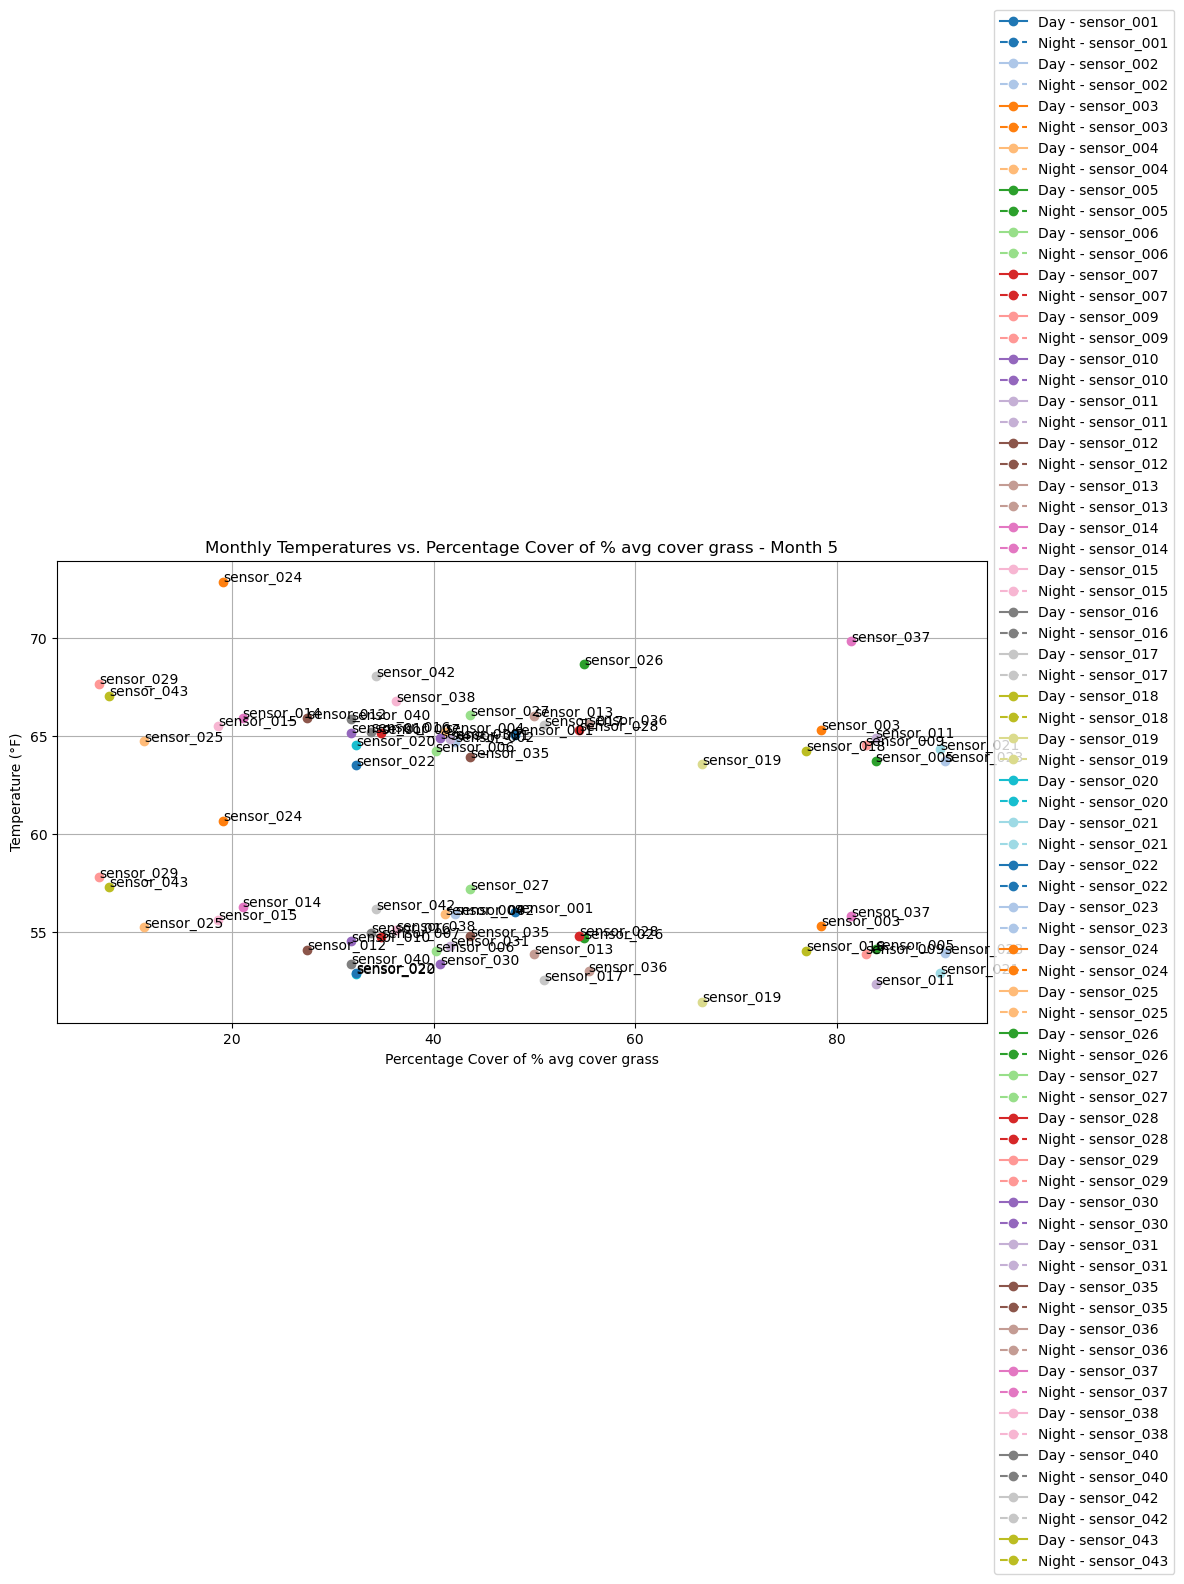

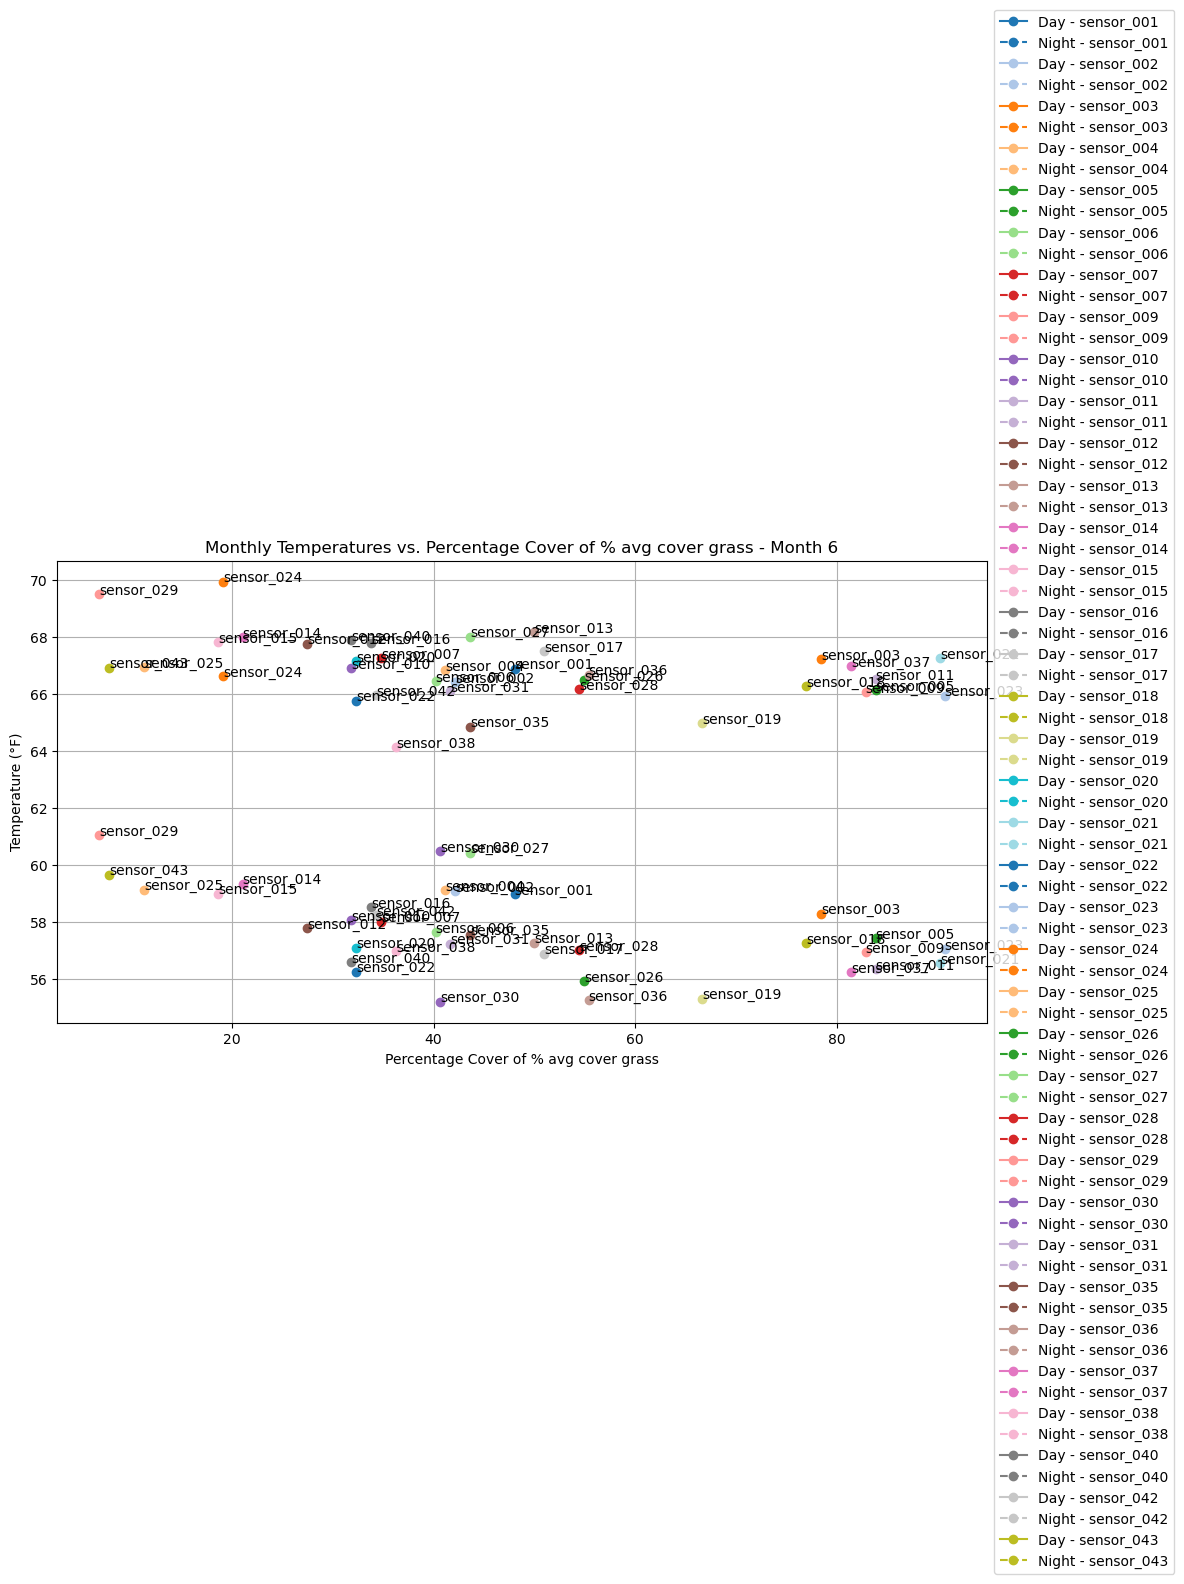

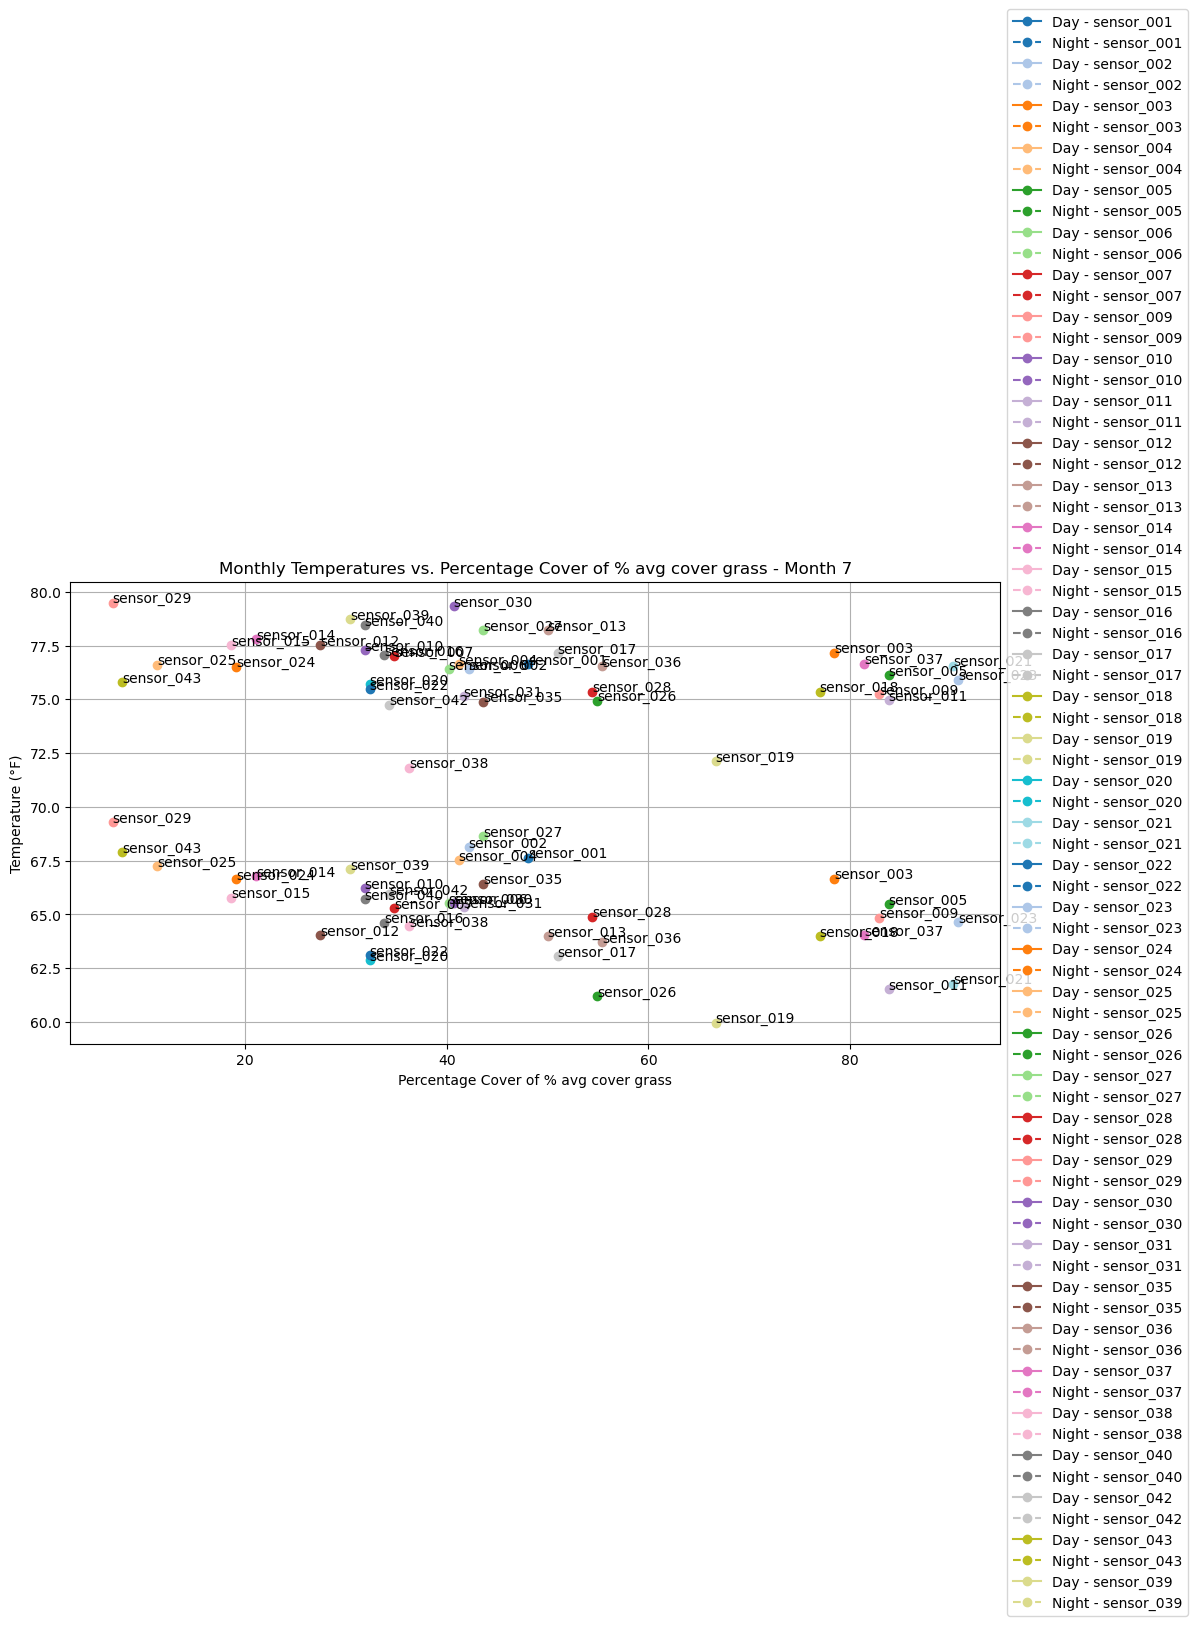

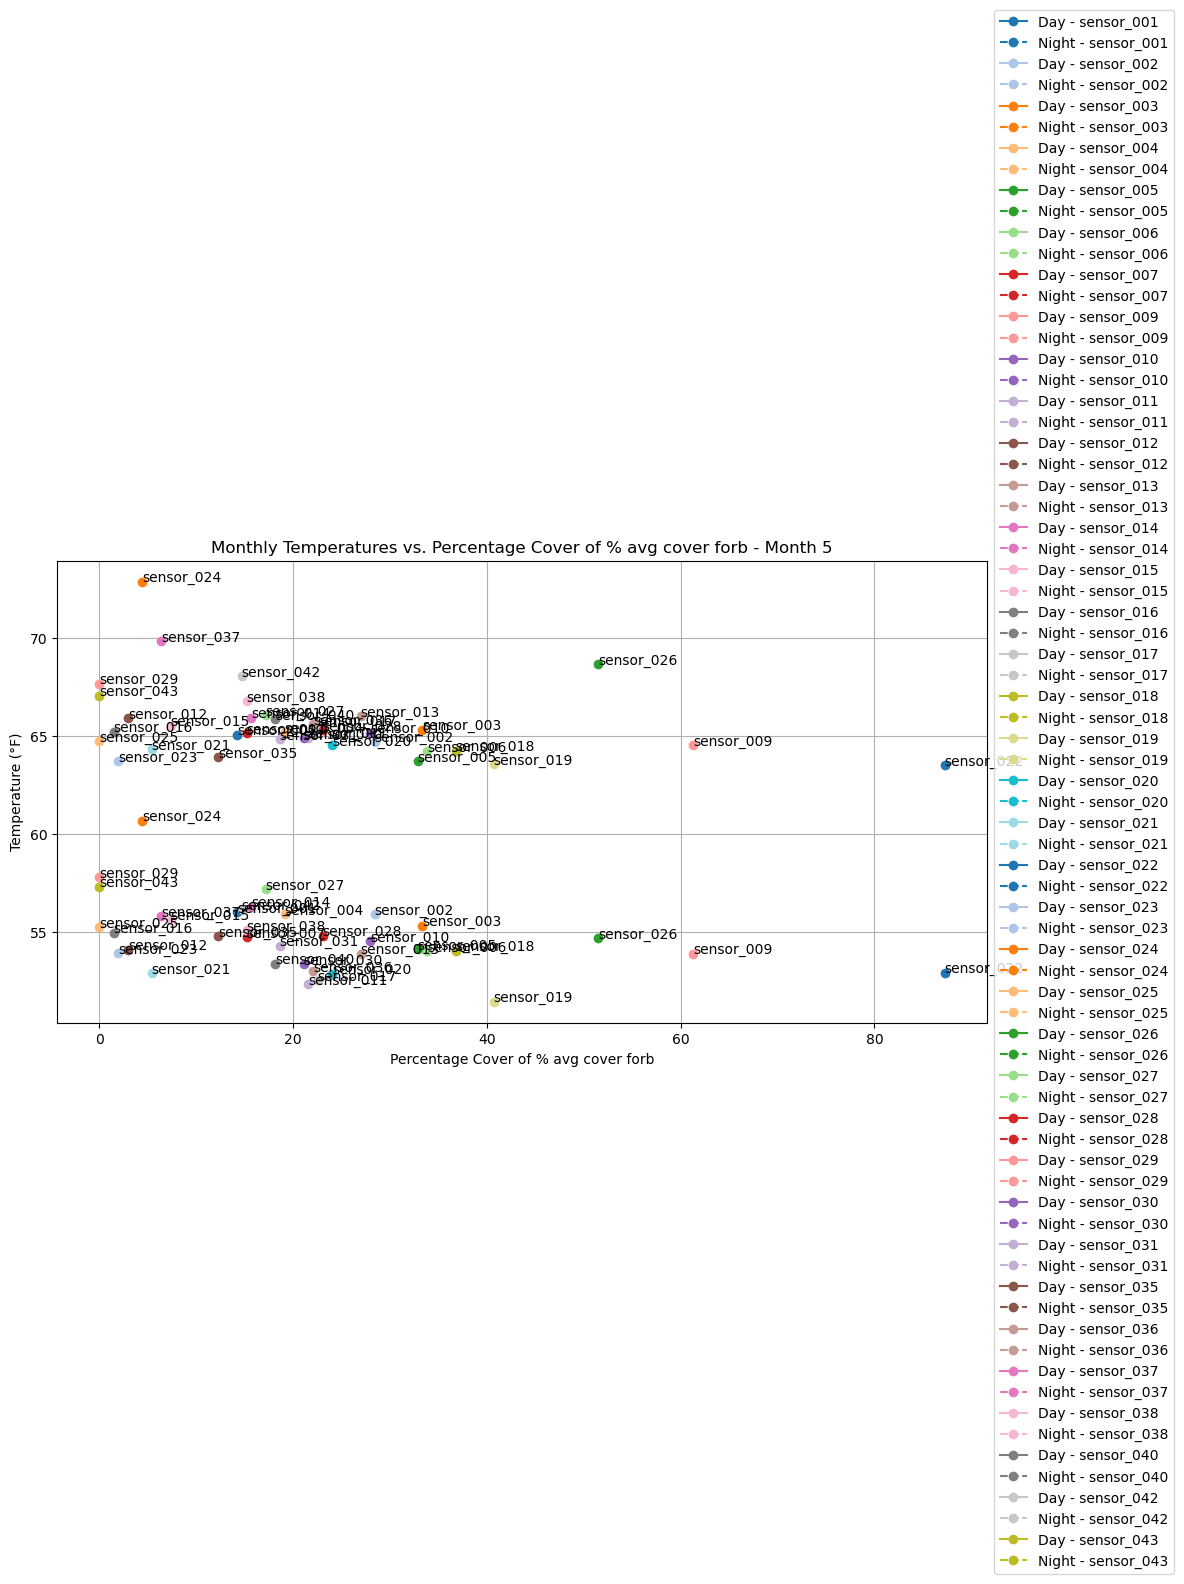

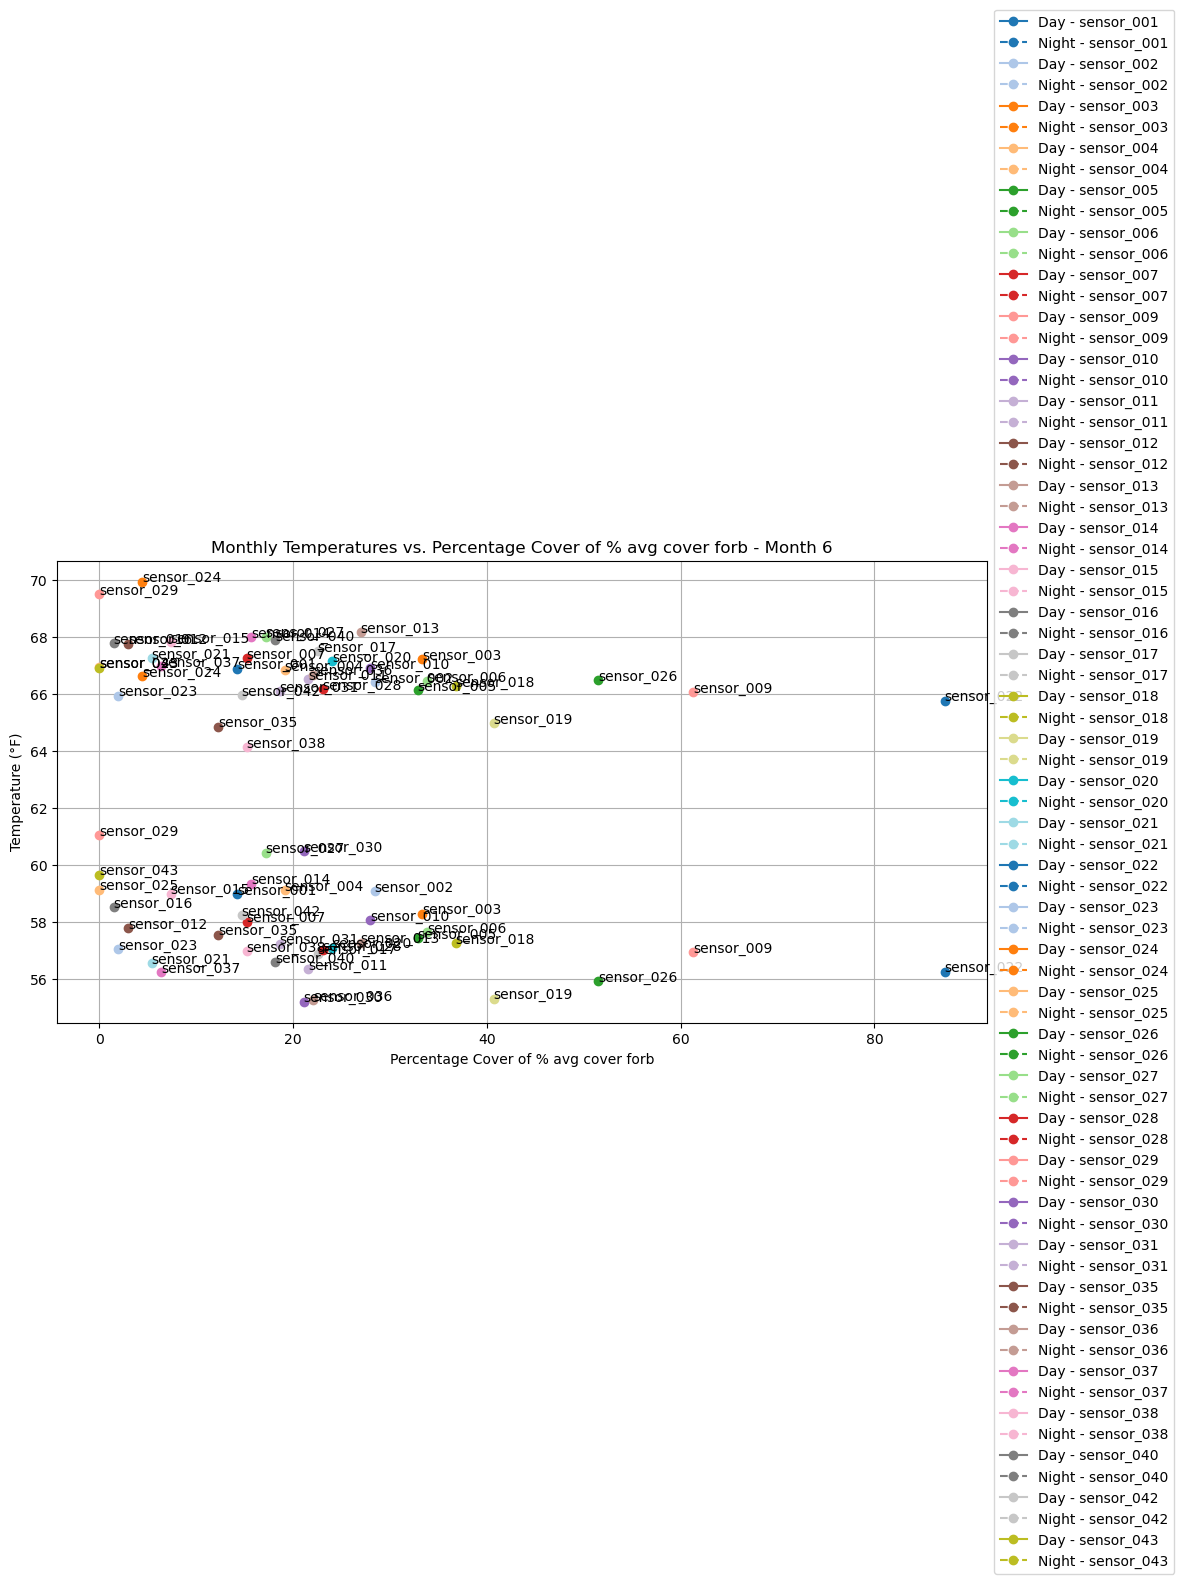

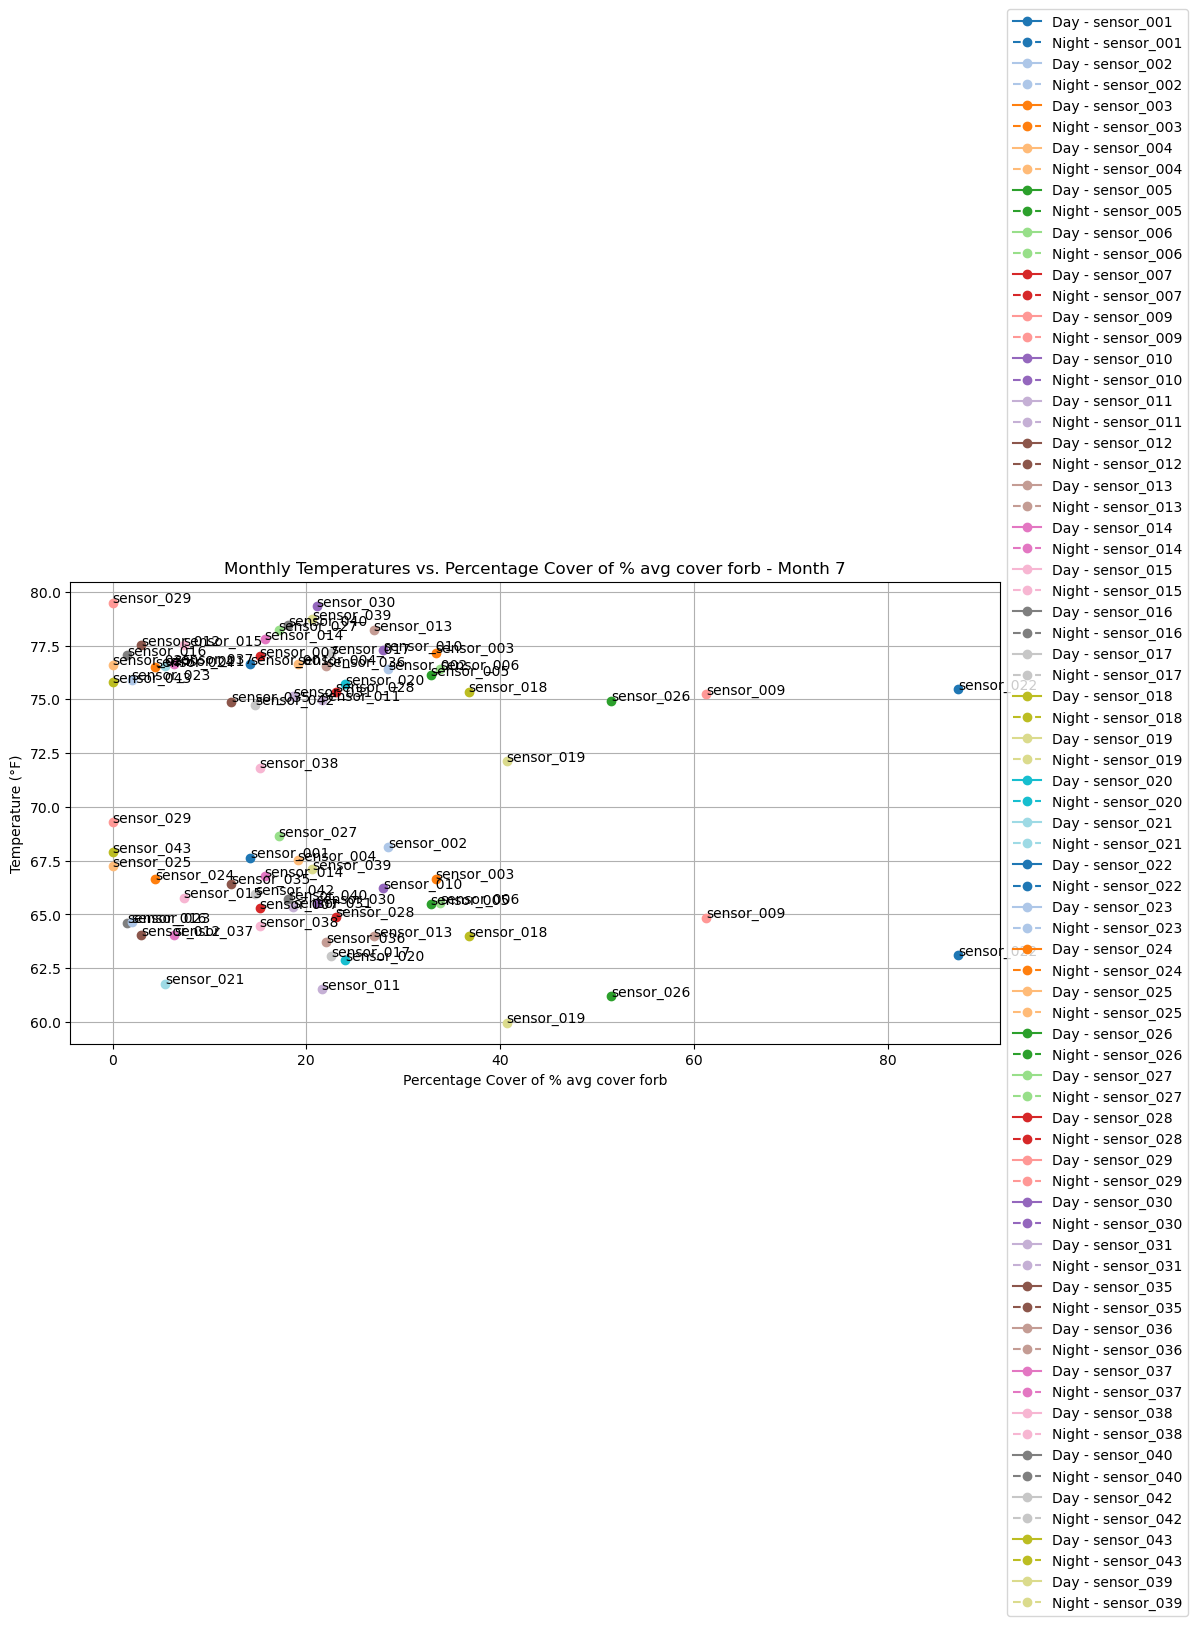

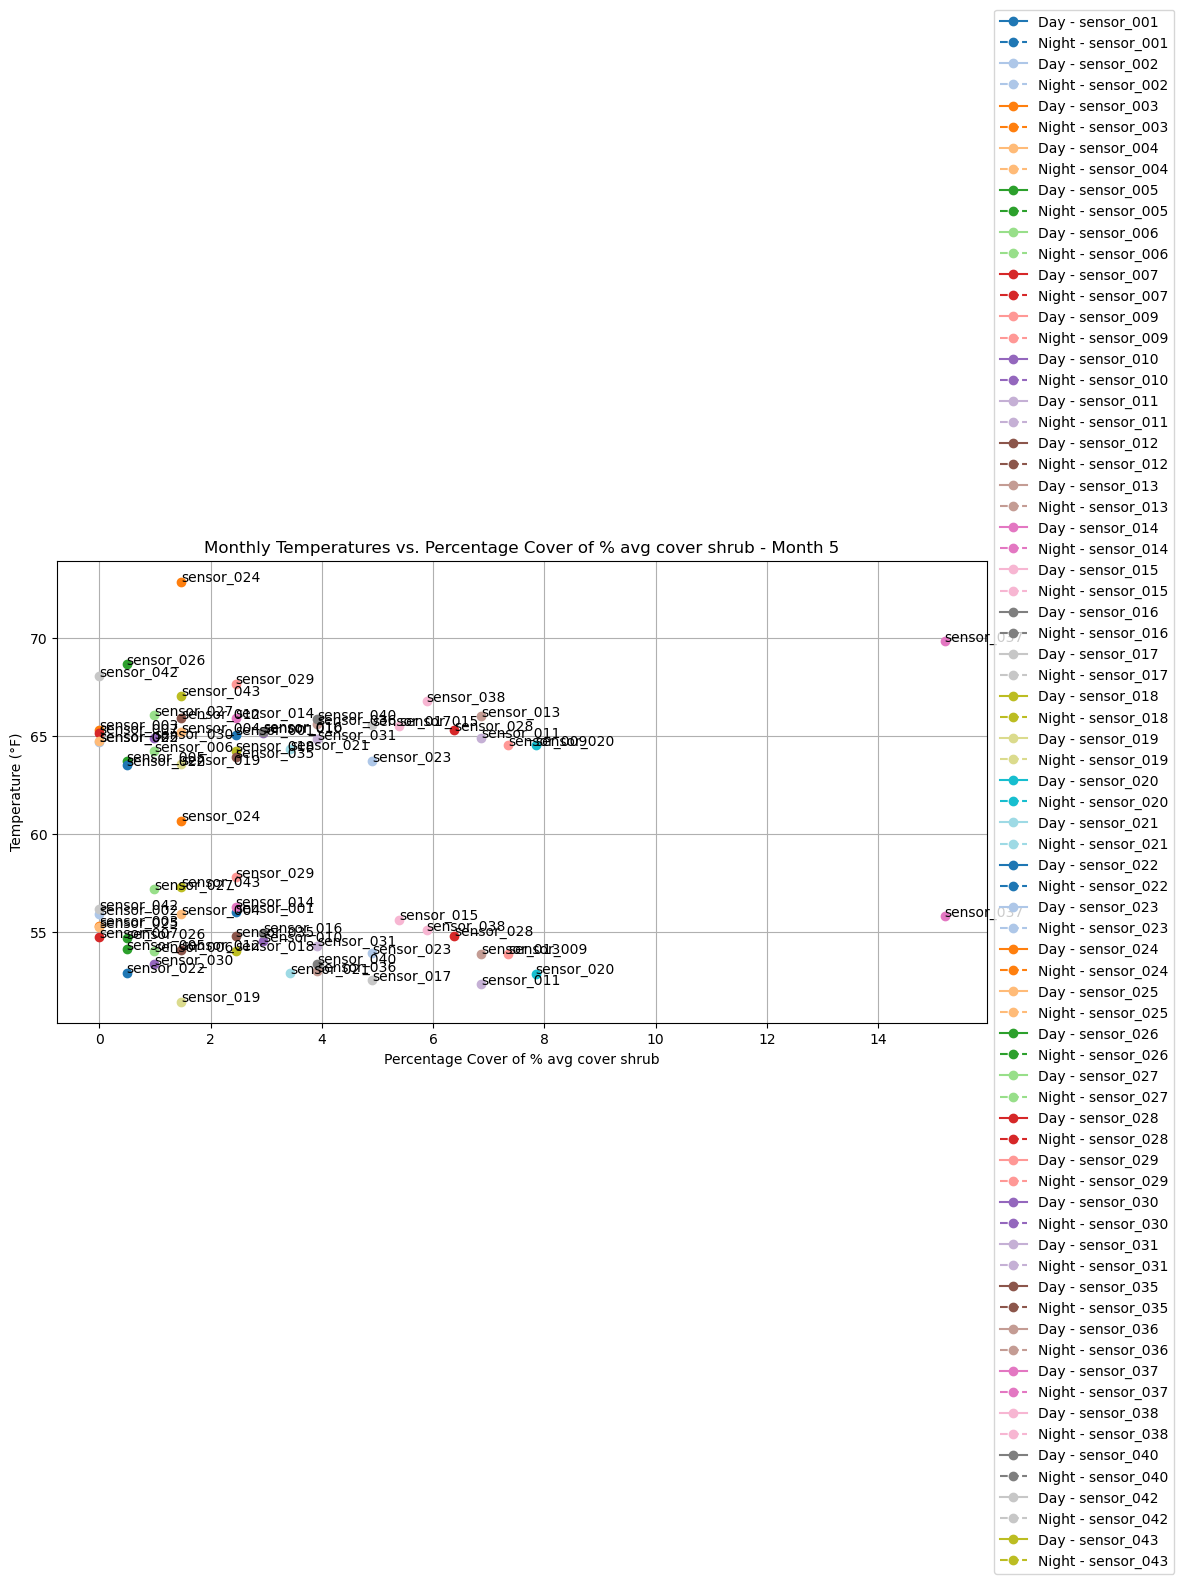

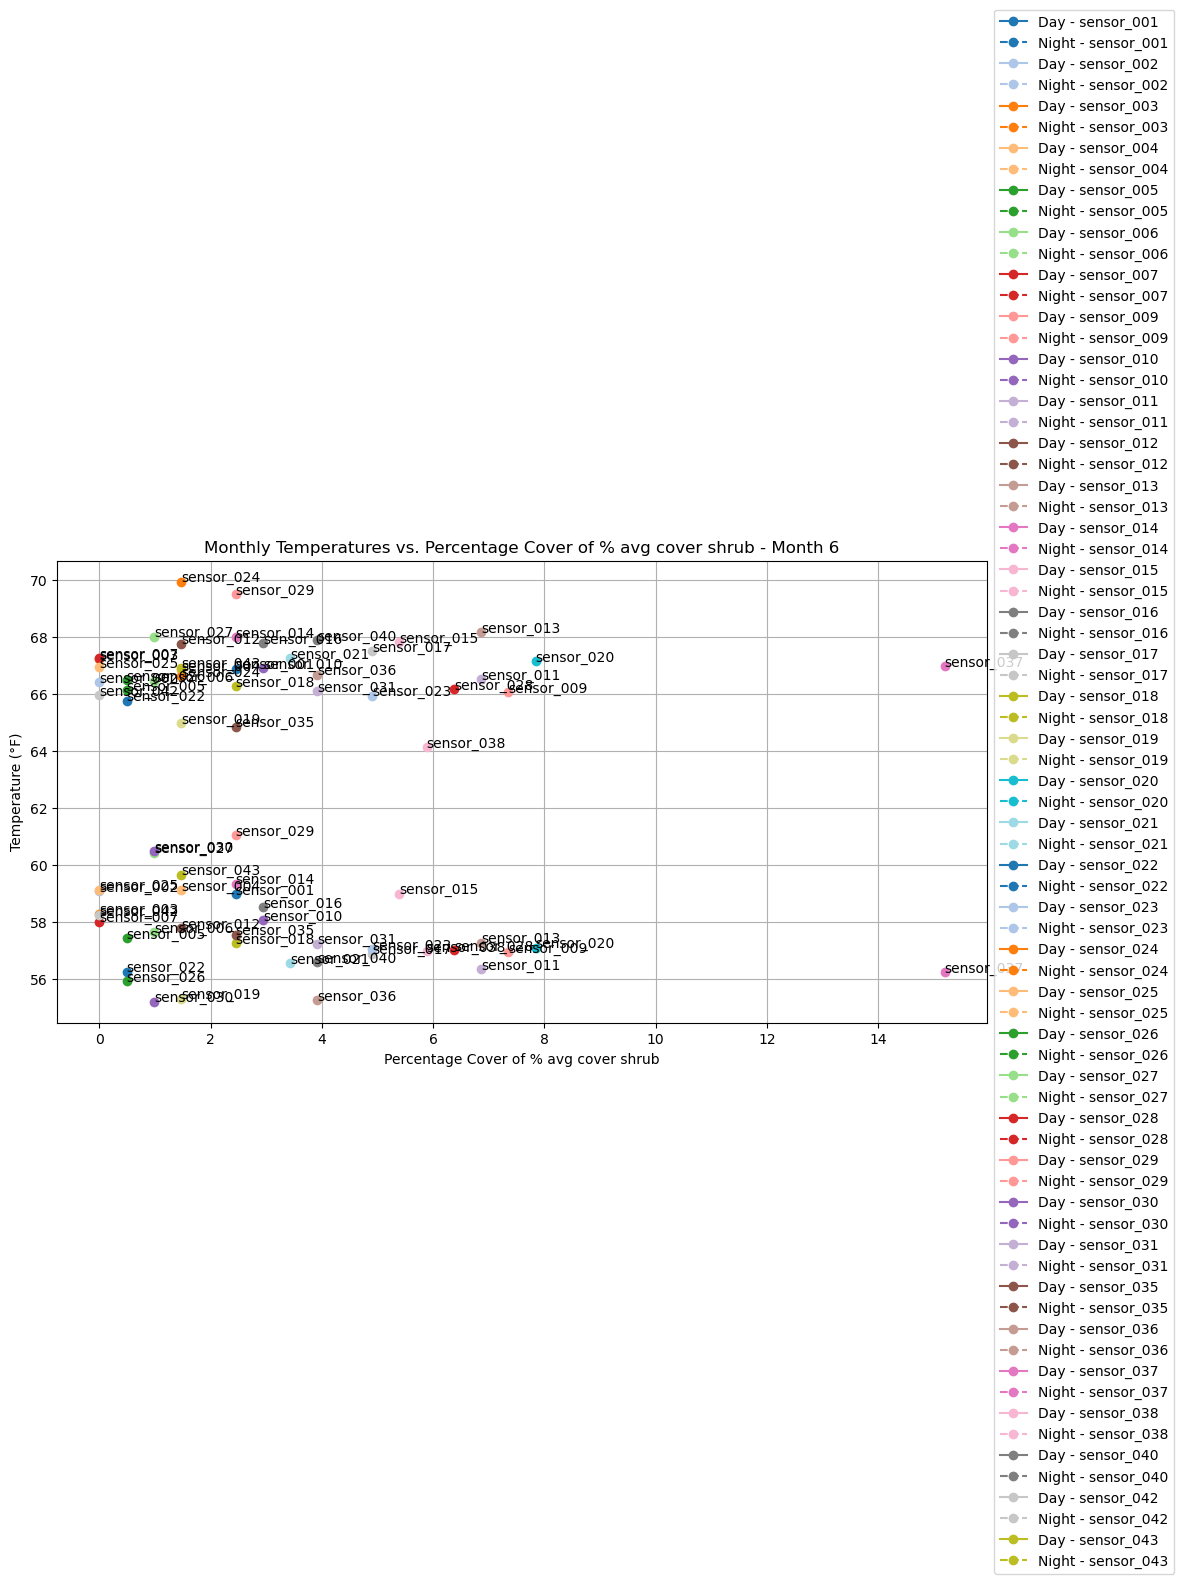

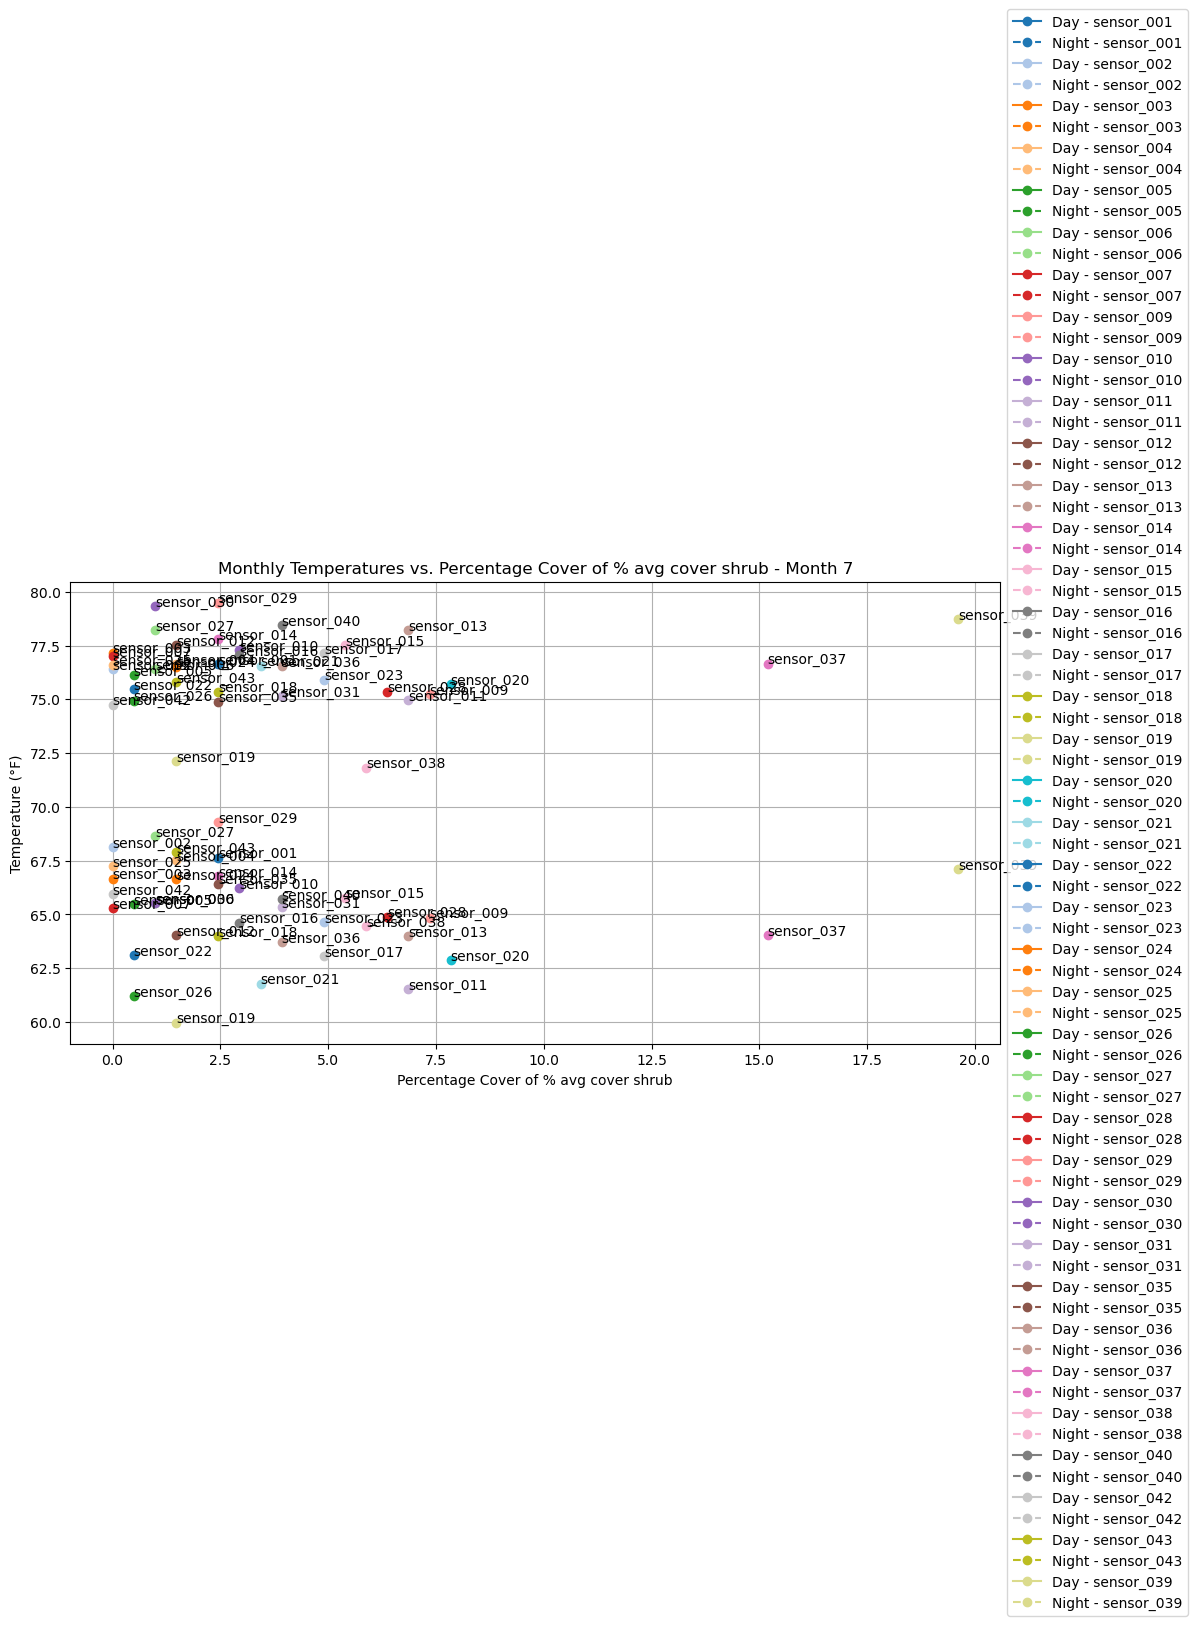

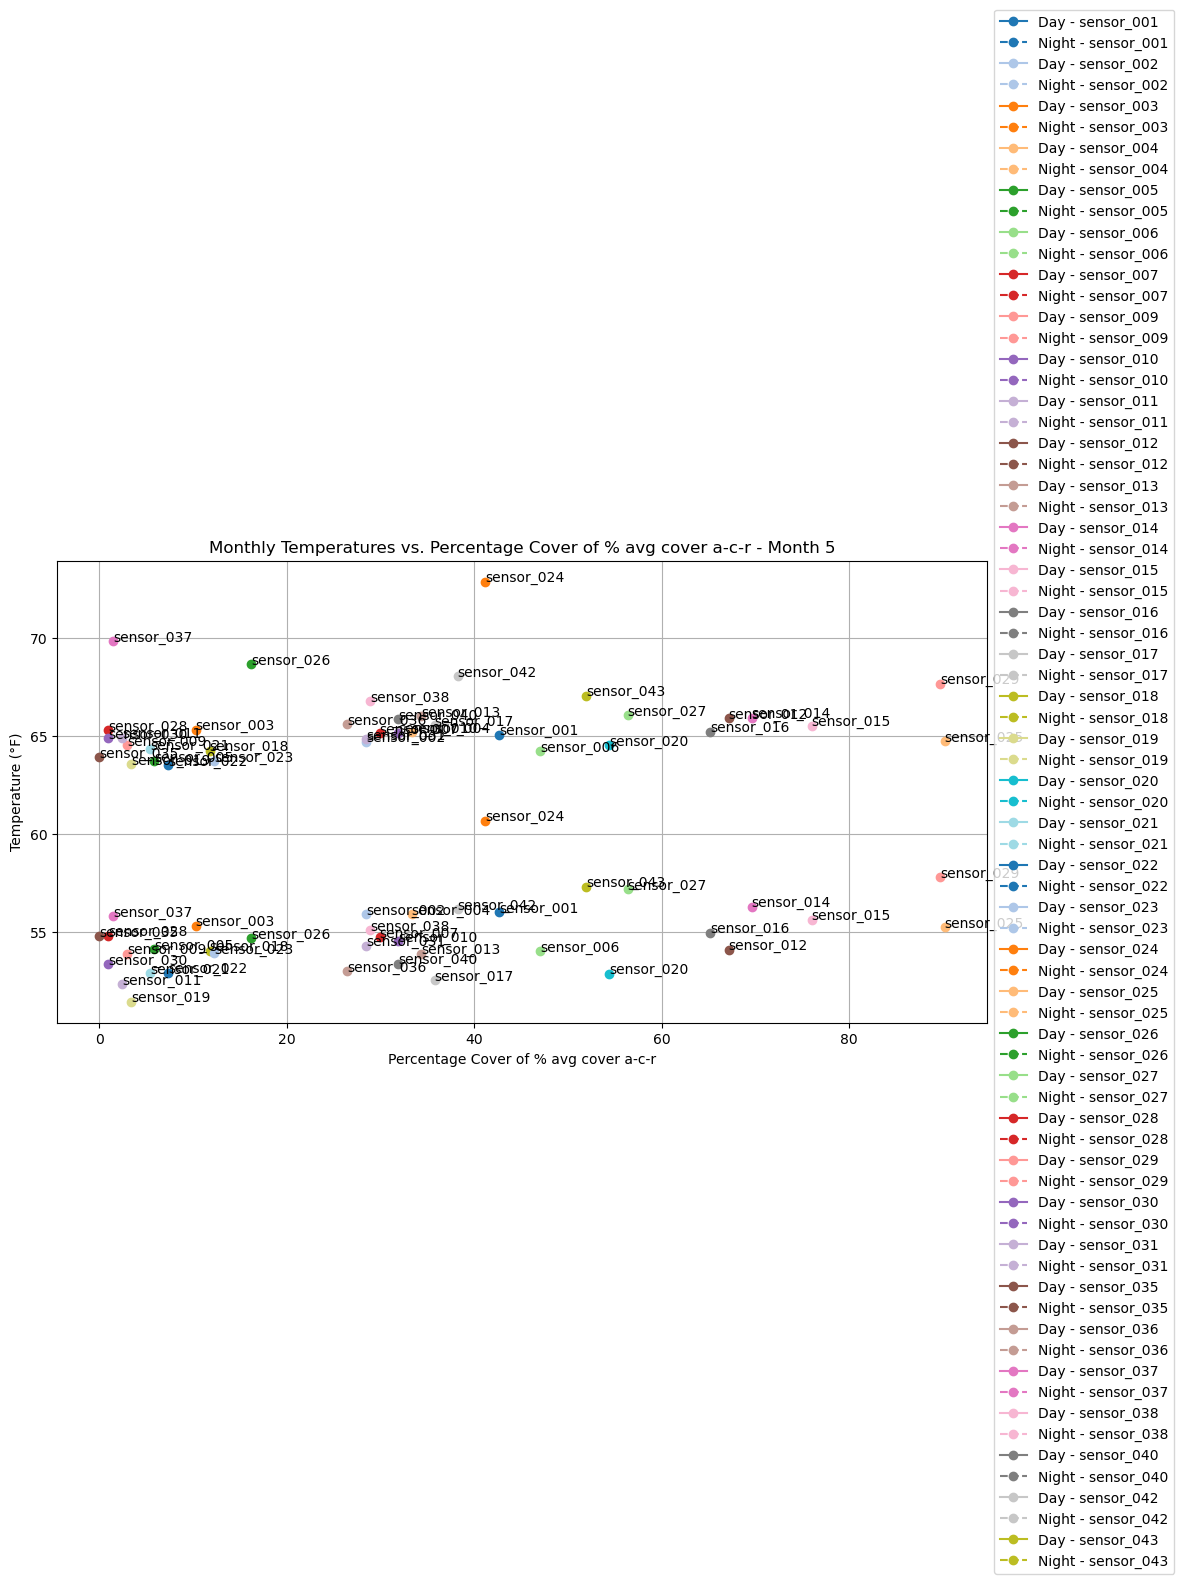

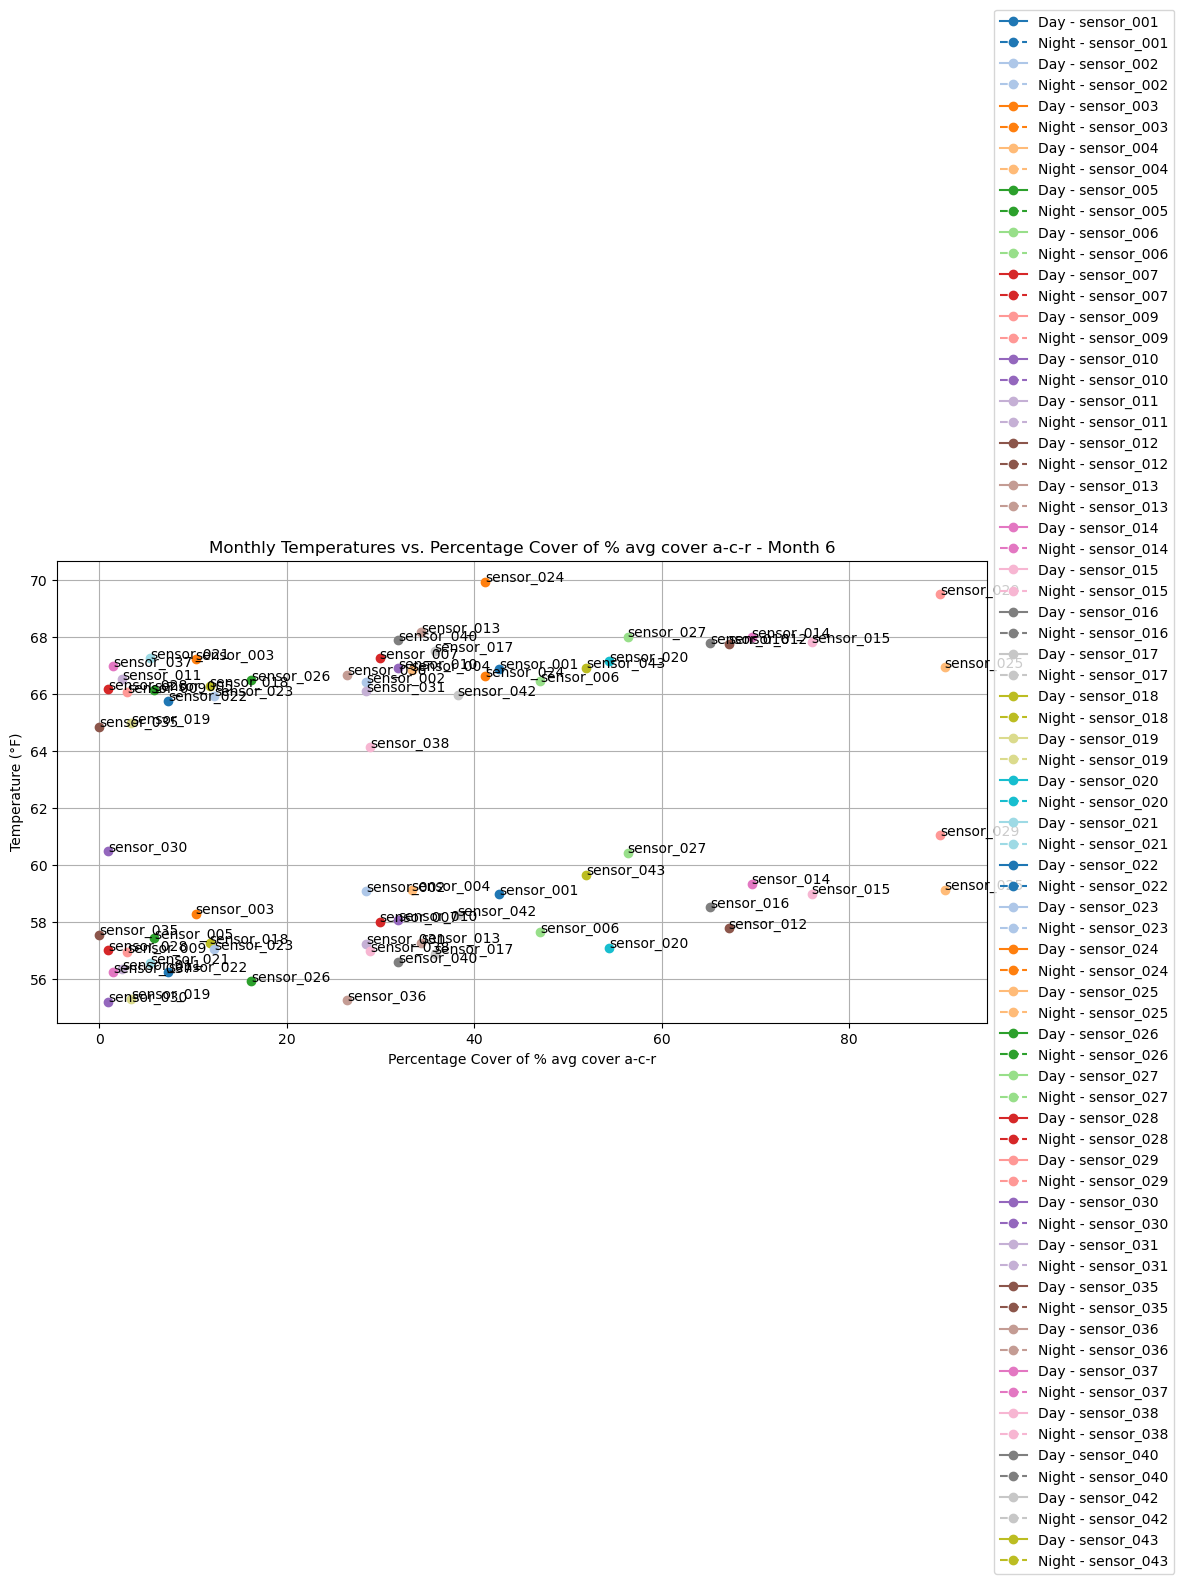

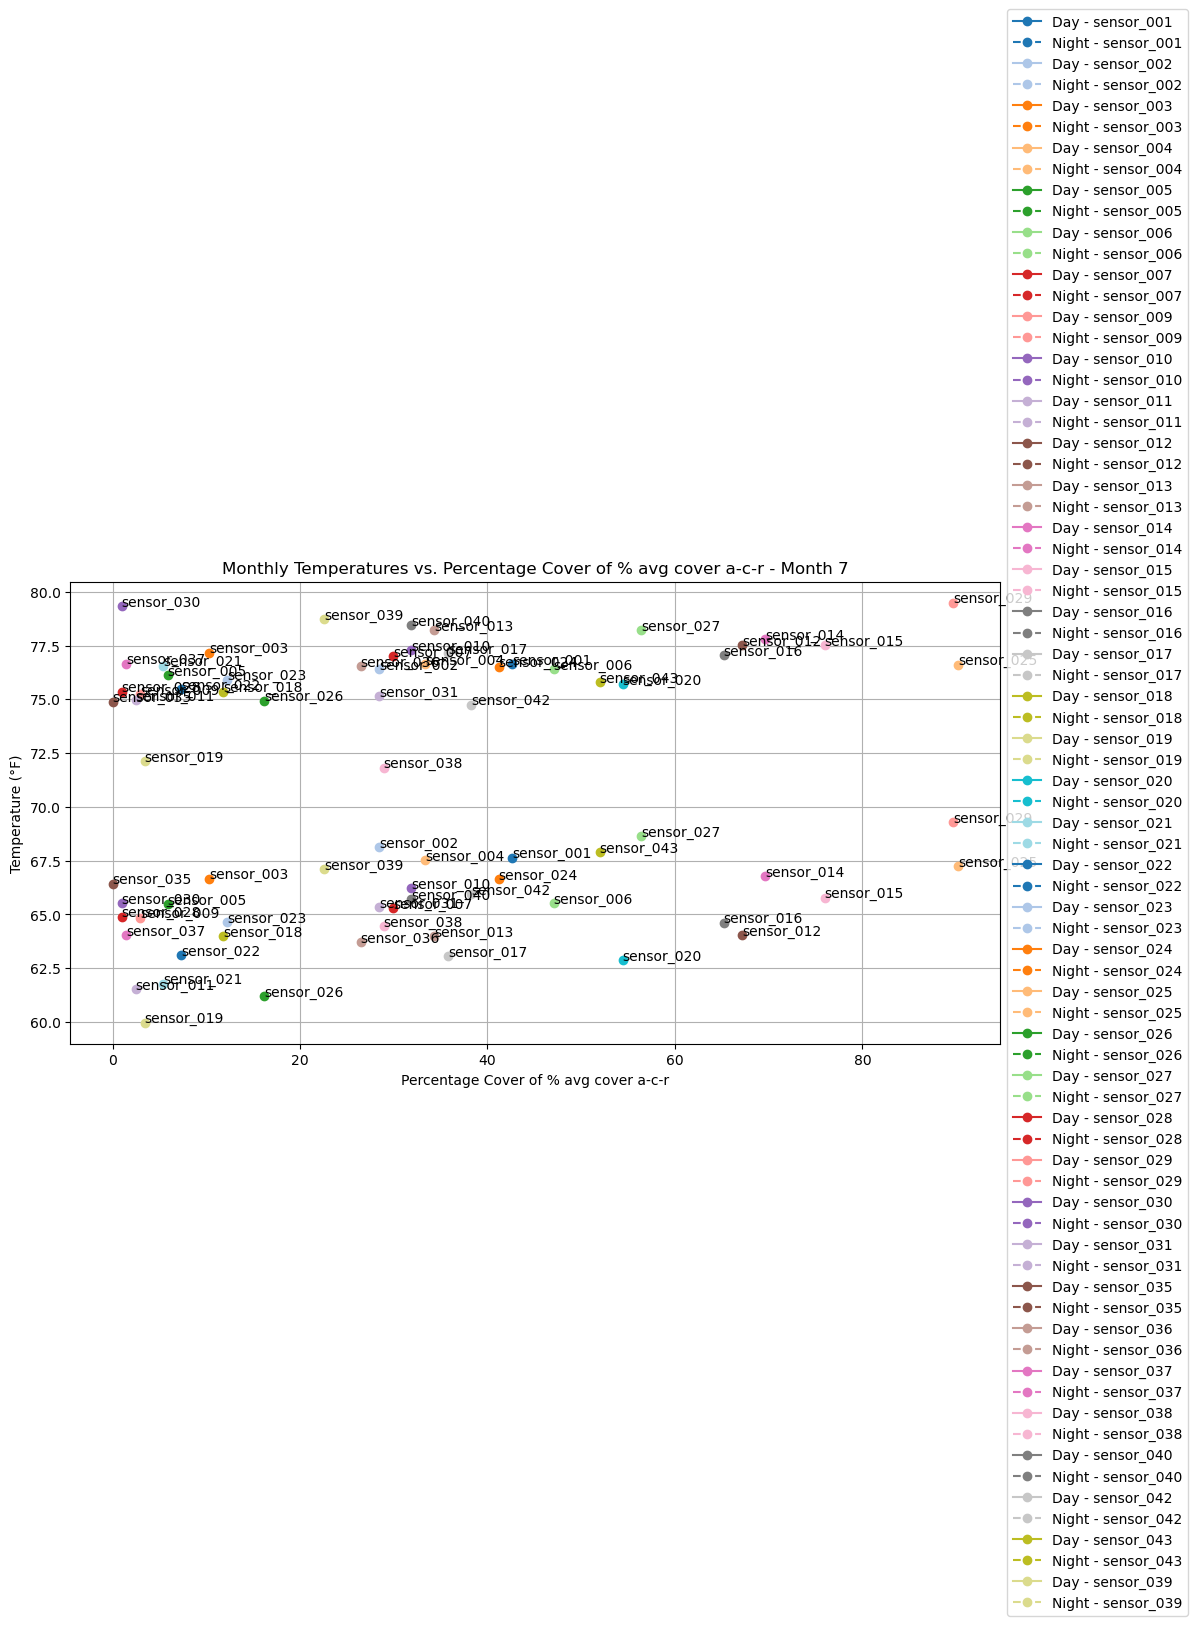

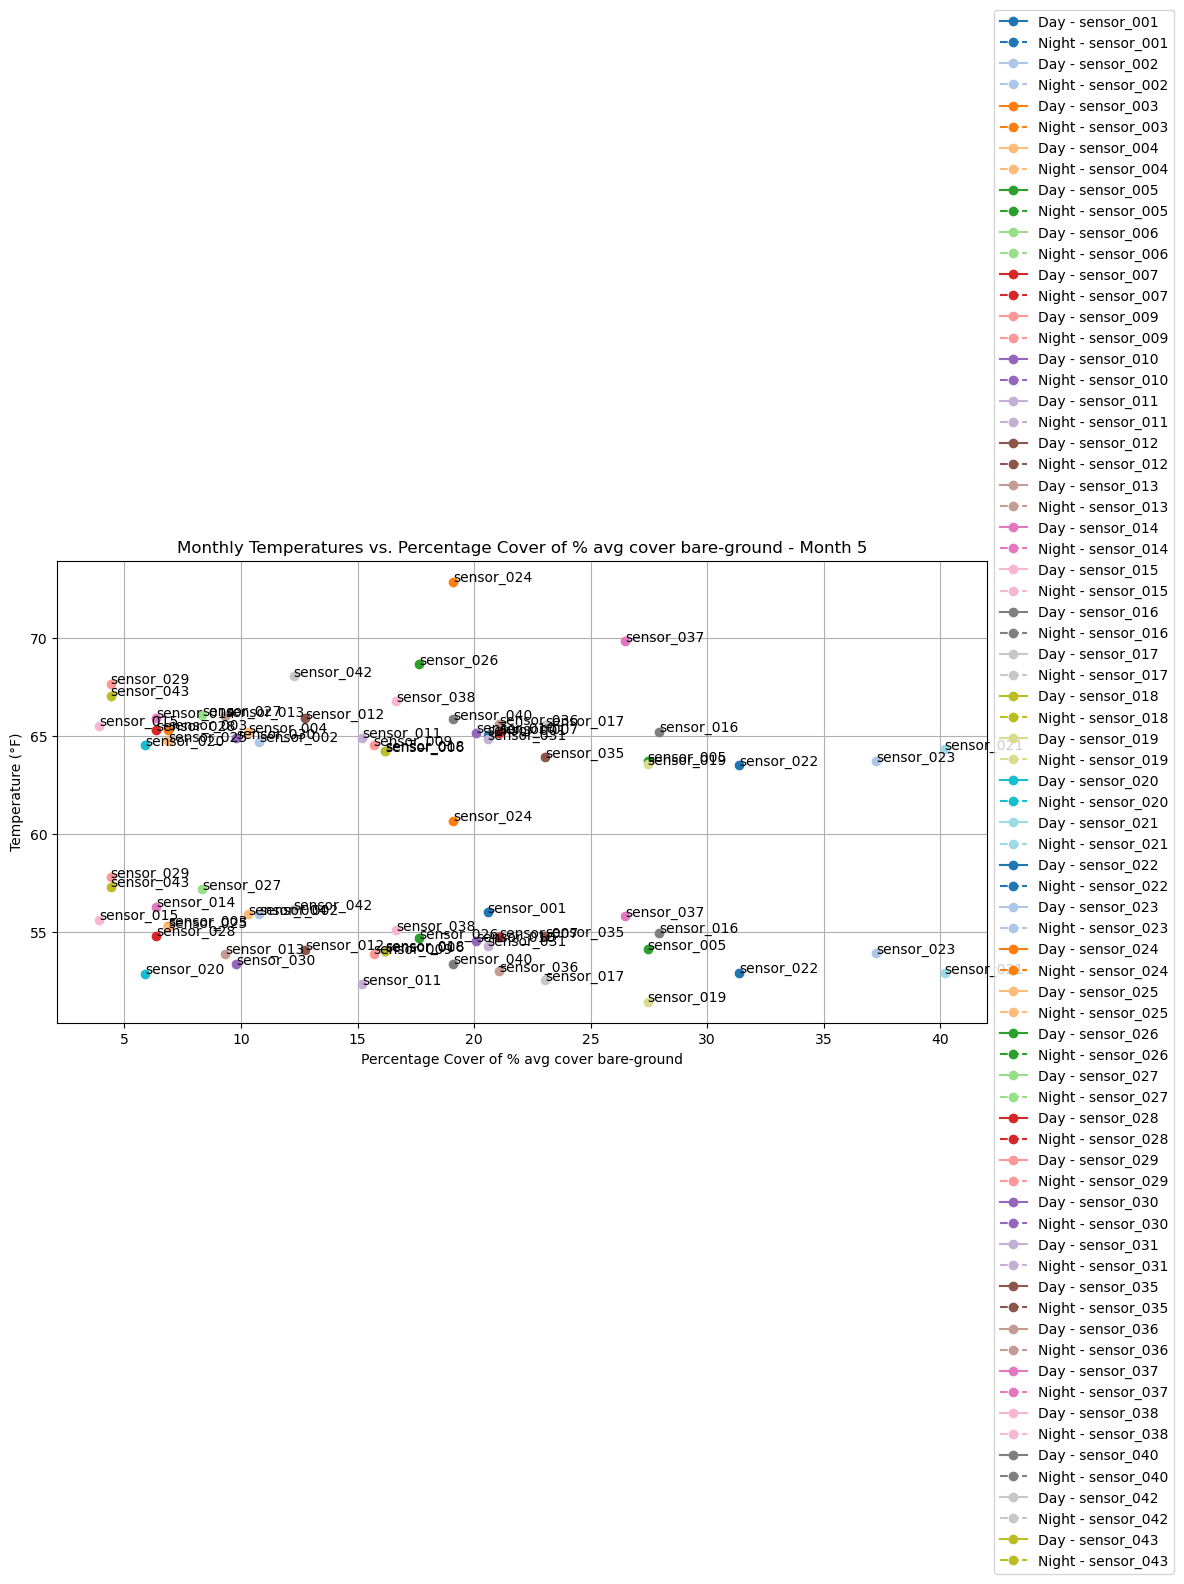

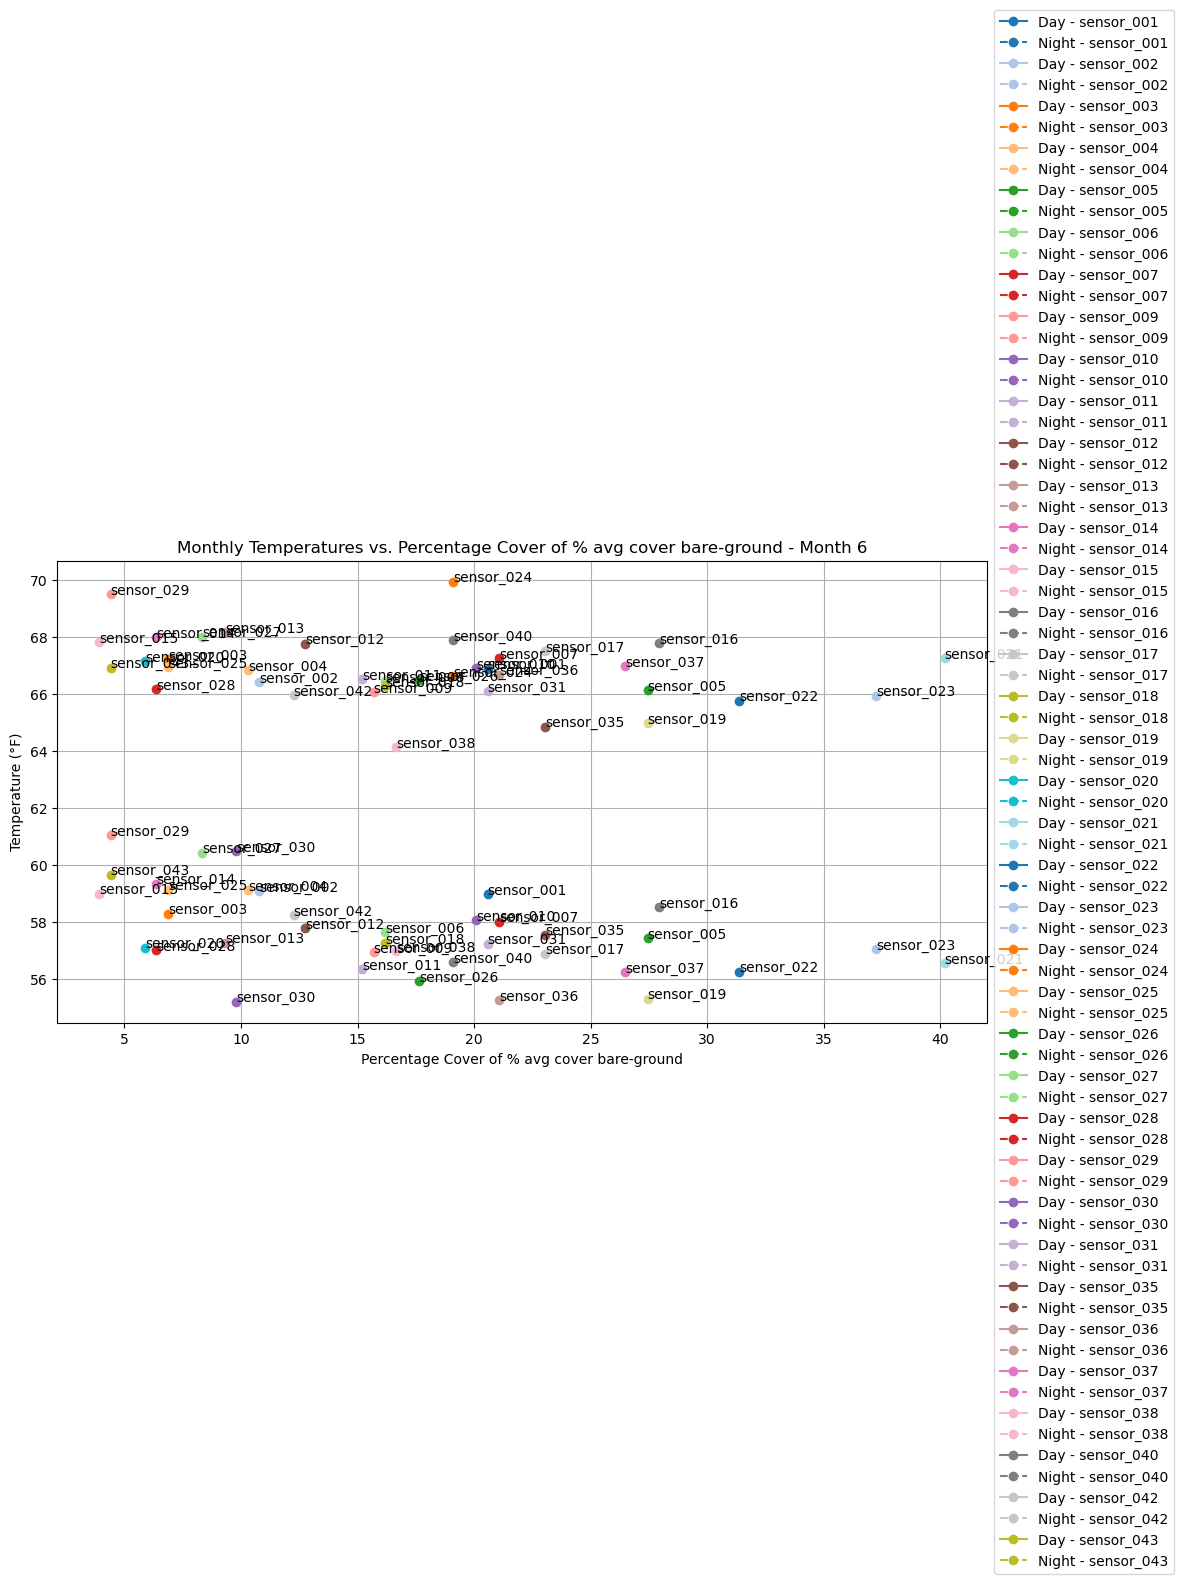

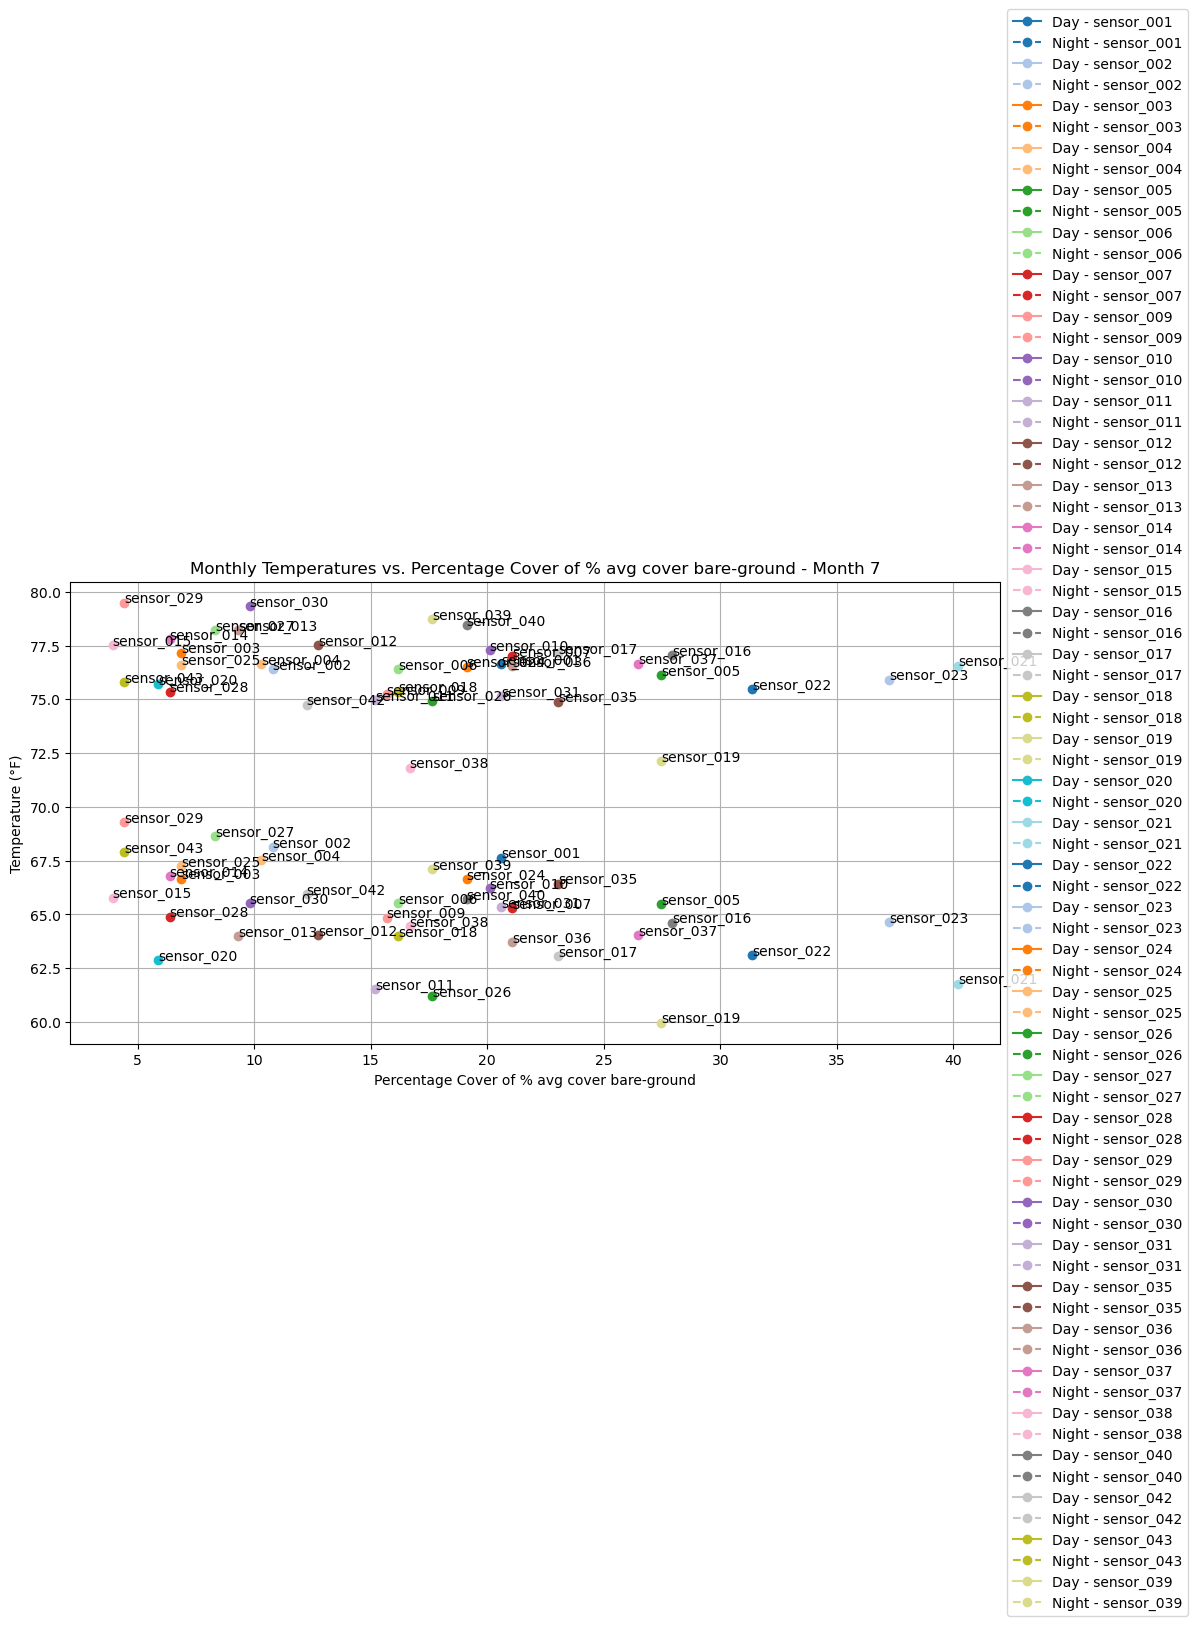

In [ ]:
import matplotlib.pyplot as plt

def plot_temps_by_cover(temps_veg, column_name, month):
    # Create a new figure
    plt.figure(figsize=(12, 6))
    
    # Get a list of unique colors for different sensor pairs
    unique_sensor_pairs = temps_veg['sensor_number'].unique()
    colors = plt.cm.tab20.colors  # You can use any color map you prefer
    
    for i, sensor_pair in enumerate(unique_sensor_pairs):
        sensor_data = temps_veg[temps_veg['sensor_number'] == sensor_pair]
        color = colors[i % len(colors)]  # Cycle through colors
        
        # Convert the month variable to integer
        month = int(month)
        
        # Filter day data for the specific sensor pair
        day_data = sensor_data[(sensor_data['Time of Day'] == 'Day') & (sensor_data['month'] == month)]
        if not day_data.empty:
            plt.plot(day_data[column_name], day_data['temp_fahrenheit'], marker='o', label=f'Day - {sensor_pair}', color=color)
            
        # Filter night data for the specific sensor pair
        night_data = sensor_data[(sensor_data['Time of Day'] == 'Night') & (sensor_data['month'] == month)]
        if not night_data.empty:
            plt.plot(night_data[column_name], night_data['temp_fahrenheit'], marker='o', label=f'Night - {sensor_pair}', linestyle='dashed', color=color)
    
        # Add labels for each sensor number if data is available
        if not day_data.empty and not night_data.empty:
            last_day_data = day_data.iloc[-1]
            last_night_data = night_data.iloc[-1]
            plt.text(last_day_data[column_name], last_day_data['temp_fahrenheit'], f'{sensor_pair}', color='black')
            plt.text(last_night_data[column_name], last_night_data['temp_fahrenheit'], f'{sensor_pair}', color='black')
    
    plt.xlabel(f'Percentage Cover of {column_name.replace("_", " ").capitalize()}')
    plt.ylabel('Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Percentage Cover of {column_name.replace("_", " ").capitalize()} - Month {month}')
    
    # Move the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.grid()
    plt.tight_layout()
    plt.show()

# List of months for which you want to create plots
months_to_plot = [5, 6, 7]  # Adjust this list as needed

# List of column names to plot
columns_to_plot = [
    '%_avg_cover_grass',
    '%_avg_cover_forb',
    '%_avg_cover_shrub',
    '%_avg_cover_A-C-R',
    '%_avg_cover_bare-ground',
    '%_avg_cover_water',
    '%_avg_cover_XL-grass',
    '%_avg_cover_XL-forb',
    '%_avg_cover_XL-shrub'
]

# Call the function for each column and each month
for column_name in columns_to_plot:
    for month in months_to_plot:
        plot_temps_by_cover(temps_veg, column_name, month)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# ... (Your data preparation code here) ...

def plot_temps_by_cover(temps_veg, column_name, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = temps_veg[temps_veg['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='temp_fahrenheit', hue='hue_identifier', palette='tab20')
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['temp_fahrenheit'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['temp_fahrenheit'])
    
    sns.regplot(data=day_data, x=column_name, y='temp_fahrenheit', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-'})

    sns.regplot(data=night_data, x=column_name, y='temp_fahrenheit', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--'})
    
    plt.xlabel(f'Percentage Cover of {column_name.replace("_", " ").capitalize()}')
    plt.ylabel('Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Percentage Cover of {column_name.replace("_", " ").capitalize()} - Month {month}')
    
    plt.legend(title='Time of Day - Sensor Number', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xlim(month_data[column_name].min() - 5, month_data[column_name].max() + 5)
    plt.show()

# List of months for which you want to create plots
months_to_plot = [5, 6, 7]  # Adjust this list as needed

# List of column names to plot
columns_to_plot = [
    '%_avg_cover_grass',
    '%_avg_cover_forb',
    '%_avg_cover_shrub',
    '%_avg_cover_A-C-R',
    '%_avg_cover_bare-ground',
    '%_avg_cover_water',
    '%_avg_cover_XL-grass',
    '%_avg_cover_XL-forb',
    '%_avg_cover_XL-shrub'
]

# Call the function for each column and each month
for column_name in columns_to_plot:
    for month in months_to_plot:
        plot_temps_by_cover(temps_veg, column_name, month)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# ... (Your data preparation code here) ...

def plot_temps_by_cover(temps_veg, column_name, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = temps_veg[temps_veg['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='temp_fahrenheit', hue='hue_identifier', palette='tab20')
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['temp_fahrenheit'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['temp_fahrenheit'])
    
    sns.regplot(data=day_data, x=column_name, y='temp_fahrenheit', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-'})

    sns.regplot(data=night_data, x=column_name, y='temp_fahrenheit', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--'})
    
    plt.xlabel(f'Percentage Cover of {column_name.replace("_", " ").capitalize()}')
    plt.ylabel('Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Percentage Cover of {column_name.replace("_", " ").capitalize()} - Month {month}')
    
    plt.legend(title='Time of Day - Sensor Number', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xlim(month_data[column_name].min() - 5, month_data[column_name].max() + 5)
    plt.show()

# List of months for which you want to create plots
months_to_plot = [5, 6, 7]  # Adjust this list as needed

# List of column names to plot
columns_to_plot = [
    'avg_green_cover', 'avg_impervious_cover'
]

# Call the function for each column and each month
for column_name in columns_to_plot:
    for month in months_to_plot:
        plot_temps_by_cover(temps_veg, column_name, month)

In [ ]:
tree_abundance = pd.read_csv('veg-data/tree_abundance .csv')
tree_abundance.dropna(how='all', inplace=True)
tree_abundance

In [ ]:

# Assuming 'ID' in tree_abundance corresponds to 'sensor_number' in monthly_avg_max_temps
tree_temps = tree_abundance.merge(monthly_avg_max_temps, left_on='ID', right_on='sensor_number', how='left')

# Forward-fill the temperature data to fill the NaNs with the temperature values for each sensor
tree_temps['temp_fahrenheit'] = mtree_temps.groupby('ID')['temp_fahrenheit'].fillna(method='ffill')

# Drop the redundant 'sensor_number' column
tree_temps.drop(columns=['sensor_number'], inplace=True)
tree_temps